In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from main.alpaca import *
from main.datagen import *
from main.dataViz import *
from hand_plotting import *

In [2]:
cfg_filename = 'configs/trajectory-config.yml'
with open(cfg_filename,'r') as ymlfile:
    config = yaml.load(ymlfile)

In [3]:
config

{'data_horizon': 20,
 'test_horizon': 10,
 'row_length': 30,
 'num_class_samples': 50,
 'x_dim_time': 1,
 'y_dim_time': 63,
 'x_dim_space': 567,
 'y_dim_space': 63,
 'x_dim': 1,
 'y_dim': 1,
 'sigma_eps': 0.005,
 'lr': 0.0001,
 'nn_layers': [256],
 'activation': 'tanh',
 'basis': 'lstm',
 'num_input_points': 10,
 'num_hand_points': 21,
 'input_dim': 3,
 'shuffle': False,
 'action': 'train-set',
 'formulation': 'space'}

In [4]:
num_input_points = config['num_input_points']
num_hand_points = config['num_hand_points']
input_dim = config['input_dim']
shuffle = config['shuffle']
row_length = config['row_length']
action_label = config['action']
train_dataset = TrajectoriesDataset('/cvgl2/u/rsluo/datasets/First_Person_Action_Benchmark/Hand_pose_annotation_v1/train/', action_label, num_input_points, num_hand_points, input_dim, row_length, shuffle)
val_dataset = TrajectoriesDataset('/cvgl2/u/rsluo/datasets/First_Person_Action_Benchmark/Hand_pose_annotation_v1/valid/', action_label, num_input_points, num_hand_points, input_dim, row_length, shuffle)
test_dataset = TrajectoriesDataset('/cvgl2/u/rsluo/datasets/First_Person_Action_Benchmark/Hand_pose_annotation_v1/test/', action_label, num_input_points, num_hand_points, input_dim, row_length, shuffle)

len_train_dataset = train_dataset.__len__()
num_samples_train = len_train_dataset
Y1, X1, init1 = train_dataset.sample_trajectories(num_samples_train)
Y2, X2, init2 = train_dataset.sample_trajectories(num_samples_train)
print('Y1 size', Y1.shape)
print('X1 size', X1.shape)
print('init1 size', init1.shape)
print('Y2 size', Y2.shape)
print('X2 size', X2.shape)
print('init2 size', init2.shape)
print()

len_val_dataset = val_dataset.__len__()
num_samples_val = len_val_dataset
Y_val1, X_val1, init_val1 = val_dataset.sample_trajectories(num_samples_val)
Y_val2, X_val2, init_val2 = val_dataset.sample_trajectories(num_samples_val)
print('Y_val1 size', Y_val1.shape)
print('X_val1 size', X_val1.shape)
print('init_val1 size', init_val1.shape)
print('Y_val2 size', Y_val2.shape)
print('X_val2 size', X_val2.shape)
print('init_val2 size', init_val2.shape)
print()

len_test_dataset = test_dataset.__len__()
num_samples_test = len_test_dataset
Y_test1, X_test1, init_test1 = test_dataset.sample_trajectories(num_samples_test)
Y_test2, X_test2, init_test2 = test_dataset.sample_trajectories(num_samples_test)
print('Y_test1 size', Y_test1.shape)
print('X_test1 size', X_test1.shape)
print('init_test1 size', init_test1.shape)
print('Y_test2 size', Y_test2.shape)
print('X_test2 size', X_test2.shape)
print('init_test2 size', init_test2.shape)

noise1 = 0.1
noise2 = 0.3
noise3 = 0.5

Y1 size (1784, 30, 63)
X1 size (1784, 30, 567)
init1 size (1784, 30, 63)
Y2 size (1784, 30, 63)
X2 size (1784, 30, 567)
init2 size (1784, 30, 63)

Y_val1 size (424, 30, 63)
X_val1 size (424, 30, 567)
init_val1 size (424, 30, 63)
Y_val2 size (424, 30, 63)
X_val2 size (424, 30, 567)
init_val2 size (424, 30, 63)

Y_test1 size (313, 30, 63)
X_test1 size (313, 30, 567)
init_test1 size (313, 30, 63)
Y_test2 size (313, 30, 63)
X_test2 size (313, 30, 567)
init_test2 size (313, 30, 63)


In [5]:
g1 = tf.Graph()
sess1 = tf.InteractiveSession(config=tf.ConfigProto(device_count = {'GPU': 0}, allow_soft_placement=True, log_device_placement=True), graph=g1)
agent1 = ALPaCA(config)
agent1.sigma_scalar = noise1
agent1.construct_model(sess1, g1)
agent1.train(sess1, Y1, X1, Y_val1, X_val1, 500)

cells [<tensorflow.python.ops.rnn_cell_impl.BasicLSTMCell object at 0x7fbb42dfa748>]
stacked_cell <tensorflow.python.ops.rnn_cell_impl.MultiRNNCell object at 0x7fbb42e59470>
cells [<tensorflow.python.ops.rnn_cell_impl.BasicLSTMCell object at 0x7fbb42bd6470>]
stacked_cell <tensorflow.python.ops.rnn_cell_impl.MultiRNNCell object at 0x7fbb42bd67b8>
cells [<tensorflow.python.ops.rnn_cell_impl.BasicLSTMCell object at 0x7fbb42a63160>]
stacked_cell <tensorflow.python.ops.rnn_cell_impl.MultiRNNCell object at 0x7fbb42a63a58>
ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 9
current_num_update 11
current_num_update 19
current_num_update 2
current_num_update 16
current_num_update 12
current_num_update 0
current_num_update 11
current_num_update 1
current_num_update 16
current_num_update 5
current_num_update 12
current_num_update 0
current_num_update 2
current_num_update 10
current_num_update 17
current_num_update 12
current_num_upd

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 19
current_num_update 15
current_num_update 12
current_num_update 6
current_num_update 15
current_num_update 15
current_num_update 7
current_num_update 9
current_num_update 9
current_num_update 2
current_num_update 19
current_num_update 15
current_num_update 12
current_num_update 3
current_num_update 20
current_num_update 16
current_num_update 0
current_num_update 20
current_num_update 6
current_num_update 7
current_num_update 15
current_num_update 5
current_num_update 8
current_num_update 20
current_num_update 10
current_num_update 18
current_num_update 6
current_num_update 4
current_num_update 9
current_num_update 12
current_num_update 0
current_num_update 2
current_num_update 20
current_num_update 17
current_num_update 0
current_num_update 18
current_num_update 18
current_num_update 14
current_num_update 14
current_num_update 11
current_num_update 18
current_num_update 

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 19
current_num_update 12
current_num_update 15
current_num_update 12
current_num_update 2
current_num_update 11
current_num_update 6
current_num_update 18
current_num_update 15
current_num_update 16
current_num_update 19
current_num_update 16
current_num_update 17
current_num_update 3
current_num_update 2
current_num_update 16
current_num_update 17
current_num_update 18
current_num_update 1
current_num_update 1
current_num_update 20
current_num_update 4
current_num_update 9
current_num_update 1
current_num_update 12
current_num_update 1
current_num_update 10
current_num_update 13
current_num_update 13
current_num_update 6
current_num_update 5
current_num_update 13
current_num_update 9
current_num_update 14
current_num_update 18
current_num_update 17
current_num_update 0
current_num_update 7
current_num_update 1
current_num_update 19
current_num_update 8
current_num_update 

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 14
current_num_update 13
current_num_update 16
current_num_update 17
current_num_update 12
current_num_update 8
current_num_update 7
current_num_update 15
current_num_update 14
current_num_update 18
current_num_update 7
current_num_update 14
current_num_update 17
current_num_update 13
current_num_update 6
current_num_update 20
current_num_update 11
current_num_update 17
current_num_update 10
current_num_update 0
current_num_update 10
current_num_update 18
current_num_update 5
current_num_update 19
current_num_update 6
current_num_update 2
current_num_update 9
current_num_update 20
current_num_update 9
current_num_update 1
current_num_update 14
current_num_update 13
current_num_update 8
current_num_update 12
current_num_update 11
current_num_update 10
current_num_update 14
current_num_update 17
current_num_update 19
current_num_update 6
current_num_update 13
current_num_upd

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 11
current_num_update 12
current_num_update 15
current_num_update 3
current_num_update 8
current_num_update 14
current_num_update 14
current_num_update 17
current_num_update 5
current_num_update 19
current_num_update 19
current_num_update 5
current_num_update 12
current_num_update 14
current_num_update 1
current_num_update 16
current_num_update 14
current_num_update 2
current_num_update 17
current_num_update 13
current_num_update 4
current_num_update 8
current_num_update 20
current_num_update 5
current_num_update 7
current_num_update 8
current_num_update 13
current_num_update 15
current_num_update 11
current_num_update 9
current_num_update 17
current_num_update 10
current_num_update 2
current_num_update 6
current_num_update 7
current_num_update 11
current_num_update 6
current_num_update 3
current_num_update 18
current_num_update 14
current_num_update 0
current_num_update 1

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 0
current_num_update 19
current_num_update 12
current_num_update 7
current_num_update 7
current_num_update 20
current_num_update 1
current_num_update 12
current_num_update 10
current_num_update 15
current_num_update 10
current_num_update 2
current_num_update 12
current_num_update 11
current_num_update 10
current_num_update 9
current_num_update 20
current_num_update 9
current_num_update 13
current_num_update 1
current_num_update 15
current_num_update 17
current_num_update 2
current_num_update 14
current_num_update 8
current_num_update 9
current_num_update 3
current_num_update 1
current_num_update 0
current_num_update 7
current_num_update 8
current_num_update 7
current_num_update 14
current_num_update 12
current_num_update 6
current_num_update 16
current_num_update 13
current_num_update 11
current_num_update 2
current_num_update 10
current_num_update 7
current_num_update 6
c

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 15
current_num_update 18
current_num_update 20
current_num_update 17
current_num_update 0
current_num_update 10
current_num_update 2
current_num_update 5
current_num_update 9
current_num_update 6
current_num_update 19
current_num_update 2
current_num_update 17
current_num_update 18
current_num_update 5
current_num_update 17
current_num_update 3
current_num_update 18
current_num_update 13
current_num_update 12
current_num_update 2
current_num_update 17
current_num_update 7
current_num_update 6
current_num_update 3
current_num_update 8
current_num_update 18
current_num_update 17
current_num_update 18
current_num_update 6
current_num_update 4
current_num_update 18
current_num_update 16
current_num_update 4
current_num_update 14
current_num_update 8
current_num_update 6
current_num_update 10
current_num_update 12
current_num_update 2
current_num_update 10
current_num_update 1


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 19
current_num_update 5
current_num_update 15
current_num_update 15
current_num_update 4
current_num_update 15
current_num_update 4
current_num_update 19
current_num_update 5
current_num_update 20
current_num_update 2
current_num_update 6
current_num_update 6
current_num_update 8
current_num_update 7
current_num_update 18
current_num_update 7
current_num_update 8
current_num_update 3
current_num_update 13
current_num_update 20
current_num_update 6
current_num_update 7
current_num_update 10
current_num_update 6
current_num_update 16
current_num_update 17
current_num_update 1
current_num_update 9
current_num_update 13
current_num_update 3
current_num_update 3
current_num_update 0
current_num_update 10
current_num_update 10
current_num_update 6
current_num_update 20
current_num_update 11
current_num_update 12
current_num_update 1
current_num_update 11
current_num_update 2
cur

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 18
current_num_update 2
current_num_update 12
current_num_update 1
current_num_update 6
current_num_update 12
current_num_update 17
current_num_update 20
current_num_update 7
current_num_update 20
current_num_update 2
current_num_update 9
current_num_update 13
current_num_update 13
current_num_update 0
current_num_update 10
current_num_update 11
current_num_update 3
current_num_update 7
current_num_update 19
current_num_update 12
current_num_update 8
current_num_update 2
current_num_update 4
current_num_update 0
current_num_update 4
current_num_update 11
current_num_update 9
current_num_update 6
current_num_update 20
current_num_update 14
current_num_update 1
current_num_update 1
current_num_update 8
current_num_update 1
current_num_update 3
current_num_update 17
current_num_update 2
current_num_update 13
current_num_update 15
current_num_update 20
current_num_update 14
cu

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 16
current_num_update 11
current_num_update 12
current_num_update 5
current_num_update 3
current_num_update 4
current_num_update 4
current_num_update 17
current_num_update 8
current_num_update 6
current_num_update 9
current_num_update 0
current_num_update 13
current_num_update 0
current_num_update 4
current_num_update 13
current_num_update 14
current_num_update 10
current_num_update 5
current_num_update 6
current_num_update 3
current_num_update 13
current_num_update 18
current_num_update 18
current_num_update 19
current_num_update 1
current_num_update 2
current_num_update 15
current_num_update 2
current_num_update 18
current_num_update 1
current_num_update 16
current_num_update 8
current_num_update 13
current_num_update 19
current_num_update 14
current_num_update 0
current_num_update 13
current_num_update 2
current_num_update 11
current_num_update 11
current_num_update 13


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 2
current_num_update 20
current_num_update 17
current_num_update 15
current_num_update 20
current_num_update 19
current_num_update 12
current_num_update 20
current_num_update 18
current_num_update 19
current_num_update 16
current_num_update 1
current_num_update 10
current_num_update 5
current_num_update 4
current_num_update 4
current_num_update 19
current_num_update 4
current_num_update 9
current_num_update 20
current_num_update 6
current_num_update 3
current_num_update 3
current_num_update 9
current_num_update 7
current_num_update 2
current_num_update 8
current_num_update 17
current_num_update 4
current_num_update 14
current_num_update 15
current_num_update 9
current_num_update 13
current_num_update 15
current_num_update 11
current_num_update 19
current_num_update 11
current_num_update 9
current_num_update 15
current_num_update 5
current_num_update 4
current_num_update 18

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 8
current_num_update 0
current_num_update 13
current_num_update 17
current_num_update 7
current_num_update 15
current_num_update 8
current_num_update 2
current_num_update 8
current_num_update 8
current_num_update 19
current_num_update 9
current_num_update 17
current_num_update 6
current_num_update 14
current_num_update 14
current_num_update 4
current_num_update 3
current_num_update 2
current_num_update 12
current_num_update 15
current_num_update 10
current_num_update 15
current_num_update 7
current_num_update 15
current_num_update 19
current_num_update 6
current_num_update 18
current_num_update 5
current_num_update 7
current_num_update 20
current_num_update 13
current_num_update 5
current_num_update 9
current_num_update 4
current_num_update 0
current_num_update 0
current_num_update 16
current_num_update 11
current_num_update 1
current_num_update 9
current_num_update 15
cur

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 10
current_num_update 11
current_num_update 12
current_num_update 7
current_num_update 19
current_num_update 17
current_num_update 15
current_num_update 20
current_num_update 20
current_num_update 8
current_num_update 16
current_num_update 10
current_num_update 5
current_num_update 6
current_num_update 18
current_num_update 15
current_num_update 7
current_num_update 2
current_num_update 17
current_num_update 16
current_num_update 15
current_num_update 6
current_num_update 12
current_num_update 0
current_num_update 15
current_num_update 4
current_num_update 2
current_num_update 6
current_num_update 0
current_num_update 3
current_num_update 10
current_num_update 15
current_num_update 4
current_num_update 10
current_num_update 19
current_num_update 4
current_num_update 15
current_num_update 5
current_num_update 20
current_num_update 17
current_num_update 7
current_num_update 

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 0
current_num_update 19
current_num_update 16
current_num_update 1
current_num_update 18
current_num_update 3
current_num_update 20
current_num_update 1
current_num_update 16
current_num_update 7
current_num_update 15
current_num_update 7
current_num_update 19
current_num_update 0
current_num_update 12
current_num_update 13
current_num_update 14
current_num_update 15
current_num_update 1
current_num_update 3
current_num_update 12
current_num_update 7
current_num_update 14
current_num_update 7
current_num_update 19
current_num_update 3
current_num_update 20
current_num_update 15
current_num_update 7
current_num_update 10
current_num_update 13
current_num_update 4
current_num_update 6
current_num_update 5
current_num_update 19
current_num_update 7
current_num_update 3
current_num_update 1
current_num_update 8
current_num_update 13
current_num_update 6
current_num_update 15
c

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 8
current_num_update 20
current_num_update 2
current_num_update 11
current_num_update 14
current_num_update 0
current_num_update 9
current_num_update 12
current_num_update 9
current_num_update 15
current_num_update 16
current_num_update 14
current_num_update 18
current_num_update 14
current_num_update 20
current_num_update 15
current_num_update 15
current_num_update 1
current_num_update 11
current_num_update 14
current_num_update 4
current_num_update 11
current_num_update 11
current_num_update 3
current_num_update 19
current_num_update 5
current_num_update 14
current_num_update 18
current_num_update 9
current_num_update 14
current_num_update 12
current_num_update 1
current_num_update 17
current_num_update 8
current_num_update 17
current_num_update 14
current_num_update 4
current_num_update 4
current_num_update 6
current_num_update 3
current_num_update 17
current_num_update

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 10
current_num_update 19
current_num_update 2
current_num_update 2
current_num_update 13
current_num_update 11
current_num_update 20
current_num_update 3
current_num_update 5
current_num_update 1
current_num_update 17
current_num_update 20
current_num_update 15
current_num_update 5
current_num_update 20
current_num_update 7
current_num_update 5
current_num_update 18
current_num_update 11
current_num_update 17
current_num_update 18
current_num_update 7
current_num_update 16
current_num_update 15
current_num_update 17
current_num_update 14
current_num_update 15
current_num_update 2
current_num_update 10
current_num_update 12
current_num_update 2
current_num_update 18
current_num_update 9
current_num_update 7
current_num_update 1
current_num_update 16
current_num_update 6
current_num_update 16
current_num_update 9
current_num_update 19
current_num_update 6
current_num_update 

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 6
current_num_update 14
current_num_update 8
current_num_update 20
current_num_update 12
current_num_update 8
current_num_update 4
current_num_update 0
current_num_update 16
current_num_update 11
current_num_update 0
current_num_update 5
current_num_update 16
current_num_update 5
current_num_update 13
current_num_update 7
current_num_update 4
current_num_update 8
current_num_update 7
current_num_update 16
current_num_update 3
current_num_update 14
current_num_update 14
current_num_update 3
current_num_update 9
current_num_update 2
current_num_update 3
current_num_update 3
current_num_update 14
current_num_update 20
current_num_update 7
current_num_update 4
current_num_update 12
current_num_update 17
current_num_update 6
current_num_update 3
current_num_update 15
current_num_update 6
current_num_update 7
current_num_update 9
current_num_update 7
current_num_update 5
current

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 10
current_num_update 3
current_num_update 4
current_num_update 19
current_num_update 7
current_num_update 20
current_num_update 19
current_num_update 4
current_num_update 6
current_num_update 2
current_num_update 18
current_num_update 11
current_num_update 15
current_num_update 4
current_num_update 15
current_num_update 13
current_num_update 20
current_num_update 8
current_num_update 15
current_num_update 19
current_num_update 19
current_num_update 15
current_num_update 1
current_num_update 7
current_num_update 5
current_num_update 5
current_num_update 19
current_num_update 1
current_num_update 5
current_num_update 1
current_num_update 14
current_num_update 13
current_num_update 10
current_num_update 14
current_num_update 19
current_num_update 0
current_num_update 11
current_num_update 17
current_num_update 5
current_num_update 1
current_num_update 18
current_num_update 1

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 14
current_num_update 9
current_num_update 16
current_num_update 6
current_num_update 14
current_num_update 10
current_num_update 15
current_num_update 5
current_num_update 11
current_num_update 18
current_num_update 20
current_num_update 0
current_num_update 7
current_num_update 5
current_num_update 18
current_num_update 0
current_num_update 19
current_num_update 11
current_num_update 4
current_num_update 18
current_num_update 15
current_num_update 11
current_num_update 3
current_num_update 18
current_num_update 16
current_num_update 2
current_num_update 3
current_num_update 6
current_num_update 20
current_num_update 11
current_num_update 13
current_num_update 12
current_num_update 0
current_num_update 0
current_num_update 8
current_num_update 14
current_num_update 10
current_num_update 7
current_num_update 8
current_num_update 2
current_num_update 15
current_num_update 1

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 14
current_num_update 6
current_num_update 13
current_num_update 17
current_num_update 6
current_num_update 19
current_num_update 9
current_num_update 5
current_num_update 12
current_num_update 19
current_num_update 16
current_num_update 16
current_num_update 9
current_num_update 3
current_num_update 16
current_num_update 17
current_num_update 16
current_num_update 17
current_num_update 18
current_num_update 5
current_num_update 3
current_num_update 9
current_num_update 15
current_num_update 8
current_num_update 20
current_num_update 14
current_num_update 5
current_num_update 0
current_num_update 13
current_num_update 5
current_num_update 3
current_num_update 14
current_num_update 17
current_num_update 11
current_num_update 0
current_num_update 1
current_num_update 5
current_num_update 16
current_num_update 3
current_num_update 15
current_num_update 7
current_num_update 3


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 18
current_num_update 18
current_num_update 7
current_num_update 11
current_num_update 18
current_num_update 15
current_num_update 4
current_num_update 0
current_num_update 12
current_num_update 11
current_num_update 16
current_num_update 15
current_num_update 18
current_num_update 1
current_num_update 14
current_num_update 16
current_num_update 0
current_num_update 17
current_num_update 4
current_num_update 4
current_num_update 10
current_num_update 6
current_num_update 9
current_num_update 20
current_num_update 1
current_num_update 6
current_num_update 16
current_num_update 0
current_num_update 13
current_num_update 6
current_num_update 3
current_num_update 3
current_num_update 9
current_num_update 9
current_num_update 1
current_num_update 7
current_num_update 2
current_num_update 2
current_num_update 10
current_num_update 11
current_num_update 4
current_num_update 15
cu

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 9
current_num_update 13
current_num_update 13
current_num_update 12
current_num_update 8
current_num_update 12
current_num_update 3
current_num_update 3
current_num_update 14
current_num_update 8
current_num_update 1
current_num_update 9
current_num_update 19
current_num_update 16
current_num_update 0
current_num_update 2
current_num_update 11
current_num_update 13
current_num_update 7
current_num_update 3
current_num_update 15
current_num_update 4
current_num_update 19
current_num_update 7
current_num_update 10
current_num_update 9
current_num_update 3
current_num_update 3
current_num_update 13
current_num_update 11
current_num_update 12
current_num_update 20
current_num_update 11
current_num_update 1
current_num_update 4
current_num_update 18
current_num_update 0
current_num_update 14
current_num_update 14
current_num_update 20
current_num_update 12
current_num_update 15

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 8
current_num_update 11
current_num_update 20
current_num_update 6
current_num_update 0
current_num_update 12
current_num_update 16
current_num_update 13
current_num_update 1
current_num_update 0
current_num_update 0
current_num_update 13
current_num_update 17
current_num_update 14
current_num_update 14
current_num_update 5
current_num_update 16
current_num_update 15
current_num_update 12
current_num_update 4
current_num_update 20
current_num_update 13
current_num_update 15
current_num_update 19
current_num_update 16
current_num_update 15
current_num_update 15
current_num_update 11
current_num_update 10
current_num_update 15
current_num_update 15
current_num_update 19
current_num_update 20
current_num_update 9
current_num_update 7
current_num_update 14
current_num_update 20
current_num_update 1
current_num_update 14
current_num_update 14
current_num_update 5
current_num_up

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 3
current_num_update 16
current_num_update 15
current_num_update 7
current_num_update 6
current_num_update 6
current_num_update 7
current_num_update 3
current_num_update 7
current_num_update 14
current_num_update 9
current_num_update 4
current_num_update 3
current_num_update 6
current_num_update 18
current_num_update 4
current_num_update 15
current_num_update 20
current_num_update 13
current_num_update 16
current_num_update 2
current_num_update 0
current_num_update 20
current_num_update 12
current_num_update 6
current_num_update 8
current_num_update 17
current_num_update 13
current_num_update 17
current_num_update 1
current_num_update 2
current_num_update 2
current_num_update 1
current_num_update 0
current_num_update 19
current_num_update 16
current_num_update 9
current_num_update 7
current_num_update 11
current_num_update 1
current_num_update 20
current_num_update 15
curr

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 2
current_num_update 11
current_num_update 18
current_num_update 5
current_num_update 17
current_num_update 13
current_num_update 5
current_num_update 18
current_num_update 11
current_num_update 8
current_num_update 5
current_num_update 12
current_num_update 15
current_num_update 19
current_num_update 4
current_num_update 6
current_num_update 6
current_num_update 9
current_num_update 20
current_num_update 20
current_num_update 20
current_num_update 15
current_num_update 10
current_num_update 7
current_num_update 16
current_num_update 0
current_num_update 17
current_num_update 16
current_num_update 18
current_num_update 7
current_num_update 16
current_num_update 12
current_num_update 11
current_num_update 6
current_num_update 3
current_num_update 10
current_num_update 15
current_num_update 12
current_num_update 6
current_num_update 3
current_num_update 14
current_num_update

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 11
current_num_update 14
current_num_update 6
current_num_update 3
current_num_update 16
current_num_update 3
current_num_update 13
current_num_update 3
current_num_update 18
current_num_update 0
current_num_update 14
current_num_update 16
current_num_update 16
current_num_update 14
current_num_update 7
current_num_update 13
current_num_update 6
current_num_update 11
current_num_update 5
current_num_update 20
current_num_update 18
current_num_update 3
current_num_update 1
current_num_update 1
current_num_update 15
current_num_update 15
current_num_update 13
current_num_update 2
current_num_update 15
current_num_update 4
current_num_update 12
current_num_update 20
current_num_update 13
current_num_update 0
current_num_update 4
current_num_update 13
current_num_update 13
current_num_update 11
current_num_update 7
current_num_update 6
current_num_update 18
current_num_update 

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 3
current_num_update 10
current_num_update 15
current_num_update 9
current_num_update 6
current_num_update 0
current_num_update 10
current_num_update 13
current_num_update 20
current_num_update 2
current_num_update 11
current_num_update 6
current_num_update 10
current_num_update 15
current_num_update 8
current_num_update 20
current_num_update 10
current_num_update 2
current_num_update 11
current_num_update 15
current_num_update 9
current_num_update 18
current_num_update 19
current_num_update 13
current_num_update 19
current_num_update 1
current_num_update 9
current_num_update 9
current_num_update 2
current_num_update 13
current_num_update 6
current_num_update 18
current_num_update 15
current_num_update 1
current_num_update 13
current_num_update 2
current_num_update 15
current_num_update 19
current_num_update 14
current_num_update 8
current_num_update 12
current_num_update 

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 6
current_num_update 14
current_num_update 6
current_num_update 5
current_num_update 5
current_num_update 12
current_num_update 20
current_num_update 17
current_num_update 9
current_num_update 12
current_num_update 15
current_num_update 19
current_num_update 2
current_num_update 3
current_num_update 17
current_num_update 9
current_num_update 14
current_num_update 19
current_num_update 10
current_num_update 7
current_num_update 4
current_num_update 2
current_num_update 3
current_num_update 7
current_num_update 16
current_num_update 15
current_num_update 8
current_num_update 0
current_num_update 13
current_num_update 18
current_num_update 16
current_num_update 6
current_num_update 9
current_num_update 0
current_num_update 8
current_num_update 14
current_num_update 19
current_num_update 3
current_num_update 20
current_num_update 0
current_num_update 11
current_num_update 1
cu

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 12
current_num_update 17
current_num_update 2
current_num_update 17
current_num_update 18
current_num_update 6
current_num_update 4
current_num_update 2
current_num_update 20
current_num_update 1
current_num_update 19
current_num_update 19
current_num_update 6
current_num_update 2
current_num_update 20
current_num_update 5
current_num_update 18
current_num_update 5
current_num_update 5
current_num_update 3
current_num_update 16
current_num_update 18
current_num_update 3
current_num_update 14
current_num_update 6
current_num_update 19
current_num_update 14
current_num_update 0
current_num_update 4
current_num_update 4
current_num_update 20
current_num_update 7
current_num_update 17
current_num_update 15
current_num_update 3
current_num_update 10
current_num_update 5
current_num_update 12
current_num_update 20
current_num_update 16
current_num_update 4
current_num_update 15


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 9
current_num_update 12
current_num_update 0
current_num_update 5
current_num_update 14
current_num_update 11
current_num_update 17
current_num_update 12
current_num_update 4
current_num_update 5
current_num_update 8
current_num_update 7
current_num_update 14
current_num_update 15
current_num_update 18
current_num_update 18
current_num_update 9
current_num_update 4
current_num_update 2
current_num_update 9
current_num_update 8
current_num_update 8
current_num_update 9
current_num_update 3
current_num_update 2
current_num_update 4
current_num_update 20
current_num_update 5
current_num_update 16
current_num_update 10
current_num_update 19
current_num_update 5
current_num_update 5
current_num_update 3
current_num_update 15
current_num_update 0
current_num_update 11
current_num_update 3
current_num_update 1
current_num_update 9
current_num_update 5
current_num_update 20
curren

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 19
current_num_update 14
current_num_update 17
current_num_update 15
current_num_update 18
current_num_update 10
current_num_update 10
current_num_update 15
current_num_update 18
current_num_update 10
current_num_update 14
current_num_update 13
current_num_update 12
current_num_update 7
current_num_update 3
current_num_update 5
current_num_update 19
current_num_update 18
current_num_update 18
current_num_update 15
current_num_update 2
current_num_update 15
current_num_update 16
current_num_update 10
current_num_update 1
current_num_update 3
current_num_update 3
current_num_update 6
current_num_update 2
current_num_update 18
current_num_update 8
current_num_update 4
current_num_update 1
current_num_update 17
current_num_update 0
current_num_update 6
current_num_update 20
current_num_update 1
current_num_update 10
current_num_update 6
current_num_update 6
current_num_update 

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 5
current_num_update 3
current_num_update 17
current_num_update 16
current_num_update 20
current_num_update 13
current_num_update 20
current_num_update 3
current_num_update 11
current_num_update 8
current_num_update 13
current_num_update 17
current_num_update 17
current_num_update 19
current_num_update 2
current_num_update 7
current_num_update 20
current_num_update 4
current_num_update 13
current_num_update 12
current_num_update 17
current_num_update 9
current_num_update 18
current_num_update 2
current_num_update 0
current_num_update 17
current_num_update 3
current_num_update 19
current_num_update 6
current_num_update 15
current_num_update 6
current_num_update 12
current_num_update 19
current_num_update 14
current_num_update 9
current_num_update 15
current_num_update 13
current_num_update 3
current_num_update 6
current_num_update 18
current_num_update 7
current_num_update 

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 3
current_num_update 16
current_num_update 19
current_num_update 10
current_num_update 18
current_num_update 13
current_num_update 20
current_num_update 6
current_num_update 13
current_num_update 3
current_num_update 11
current_num_update 20
current_num_update 4
current_num_update 10
current_num_update 6
current_num_update 1
current_num_update 6
current_num_update 6
current_num_update 9
current_num_update 8
current_num_update 9
current_num_update 13
current_num_update 9
current_num_update 8
current_num_update 7
current_num_update 7
current_num_update 4
current_num_update 17
current_num_update 18
current_num_update 20
current_num_update 12
current_num_update 8
current_num_update 14
current_num_update 4
current_num_update 15
current_num_update 12
current_num_update 14
current_num_update 17
current_num_update 0
current_num_update 6
current_num_update 8
current_num_update 4
cu

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 5
current_num_update 1
current_num_update 18
current_num_update 16
current_num_update 5
current_num_update 10
current_num_update 19
current_num_update 10
current_num_update 11
current_num_update 11
current_num_update 15
current_num_update 18
current_num_update 0
current_num_update 8
current_num_update 13
current_num_update 17
current_num_update 5
current_num_update 1
current_num_update 20
current_num_update 11
current_num_update 11
current_num_update 12
current_num_update 0
current_num_update 15
current_num_update 1
current_num_update 19
current_num_update 13
current_num_update 17
current_num_update 11
current_num_update 15
current_num_update 13
current_num_update 9
current_num_update 17
current_num_update 8
current_num_update 10
current_num_update 3
current_num_update 11
current_num_update 2
current_num_update 12
current_num_update 12
current_num_update 17
current_num_upd

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 5
current_num_update 15
current_num_update 19
current_num_update 5
current_num_update 13
current_num_update 16
current_num_update 20
current_num_update 0
current_num_update 17
current_num_update 6
current_num_update 12
current_num_update 9
current_num_update 8
current_num_update 12
current_num_update 11
current_num_update 17
current_num_update 13
current_num_update 13
current_num_update 3
current_num_update 9
current_num_update 1
current_num_update 12
current_num_update 16
current_num_update 19
current_num_update 14
current_num_update 9
current_num_update 8
current_num_update 0
current_num_update 1
current_num_update 0
current_num_update 18
current_num_update 3
current_num_update 1
current_num_update 19
current_num_update 12
current_num_update 1
current_num_update 3
current_num_update 16
current_num_update 1
current_num_update 3
current_num_update 10
current_num_update 5
c

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 13
current_num_update 15
current_num_update 4
current_num_update 4
current_num_update 0
current_num_update 9
current_num_update 3
current_num_update 7
current_num_update 7
current_num_update 14
current_num_update 5
current_num_update 15
current_num_update 7
current_num_update 0
current_num_update 17
current_num_update 1
current_num_update 11
current_num_update 18
current_num_update 9
current_num_update 20
current_num_update 9
current_num_update 12
current_num_update 14
current_num_update 3
current_num_update 9
current_num_update 18
current_num_update 18
current_num_update 13
current_num_update 19
current_num_update 2
current_num_update 8
current_num_update 15
current_num_update 10
current_num_update 1
current_num_update 12
current_num_update 18
current_num_update 2
current_num_update 15
current_num_update 5
current_num_update 13
current_num_update 18
current_num_update 16


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 14
current_num_update 20
current_num_update 10
current_num_update 2
current_num_update 0
current_num_update 8
current_num_update 13
current_num_update 3
current_num_update 8
current_num_update 5
current_num_update 20
current_num_update 8
current_num_update 5
current_num_update 3
current_num_update 13
current_num_update 9
current_num_update 14
current_num_update 0
current_num_update 11
current_num_update 17
current_num_update 3
current_num_update 6
current_num_update 15
current_num_update 13
current_num_update 20
current_num_update 11
current_num_update 6
current_num_update 7
current_num_update 5
current_num_update 8
current_num_update 6
current_num_update 16
current_num_update 7
current_num_update 19
current_num_update 19
current_num_update 0
current_num_update 5
current_num_update 13
current_num_update 5
current_num_update 18
current_num_update 4
current_num_update 5
curr

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 15
current_num_update 17
current_num_update 13
current_num_update 6
current_num_update 14
current_num_update 0
current_num_update 10
current_num_update 18
current_num_update 15
current_num_update 5
current_num_update 11
current_num_update 19
current_num_update 13
current_num_update 20
current_num_update 9
current_num_update 6
current_num_update 9
current_num_update 11
current_num_update 4
current_num_update 16
current_num_update 2
current_num_update 7
current_num_update 16
current_num_update 17
current_num_update 9
current_num_update 7
current_num_update 17
current_num_update 7
current_num_update 0
current_num_update 5
current_num_update 13
current_num_update 13
current_num_update 2
current_num_update 17
current_num_update 14
current_num_update 6
current_num_update 18
current_num_update 12
current_num_update 14
current_num_update 7
current_num_update 4
current_num_update 0

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 10
current_num_update 8
current_num_update 18
current_num_update 6
current_num_update 10
current_num_update 0
current_num_update 17
current_num_update 20
current_num_update 14
current_num_update 4
current_num_update 18
current_num_update 8
current_num_update 7
current_num_update 10
current_num_update 8
current_num_update 18
current_num_update 9
current_num_update 8
current_num_update 14
current_num_update 6
current_num_update 15
current_num_update 2
current_num_update 9
current_num_update 0
current_num_update 15
current_num_update 0
current_num_update 16
current_num_update 0
current_num_update 18
current_num_update 2
current_num_update 20
current_num_update 9
current_num_update 17
current_num_update 7
current_num_update 9
current_num_update 14
current_num_update 17
current_num_update 16
current_num_update 16
current_num_update 2
current_num_update 5
current_num_update 4
cu

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 2
current_num_update 11
current_num_update 7
current_num_update 10
current_num_update 20
current_num_update 8
current_num_update 15
current_num_update 10
current_num_update 18
current_num_update 12
current_num_update 17
current_num_update 4
current_num_update 1
current_num_update 16
current_num_update 2
current_num_update 17
current_num_update 9
current_num_update 19
current_num_update 0
current_num_update 15
current_num_update 3
current_num_update 2
current_num_update 3
current_num_update 0
current_num_update 10
current_num_update 18
current_num_update 13
current_num_update 16
current_num_update 7
current_num_update 20
current_num_update 7
current_num_update 3
current_num_update 14
current_num_update 1
current_num_update 13
current_num_update 11
current_num_update 4
current_num_update 8
current_num_update 15
current_num_update 17
current_num_update 12
current_num_update 1

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 15
current_num_update 4
current_num_update 18
current_num_update 15
current_num_update 9
current_num_update 8
current_num_update 9
current_num_update 1
current_num_update 13
current_num_update 12
current_num_update 7
current_num_update 15
current_num_update 15
current_num_update 11
current_num_update 5
current_num_update 11
current_num_update 10
current_num_update 9
current_num_update 2
current_num_update 14
current_num_update 10
current_num_update 0
current_num_update 9
current_num_update 11
current_num_update 18
current_num_update 16
current_num_update 11
current_num_update 6
current_num_update 19
current_num_update 7
current_num_update 1
current_num_update 6
current_num_update 2
current_num_update 10
current_num_update 4
current_num_update 12
current_num_update 16
current_num_update 1
current_num_update 4
current_num_update 19
current_num_update 18
current_num_update 7


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 9
current_num_update 20
current_num_update 8
current_num_update 13
current_num_update 16
current_num_update 6
current_num_update 7
current_num_update 16
current_num_update 1
current_num_update 11
current_num_update 20
current_num_update 0
current_num_update 2
current_num_update 19
current_num_update 9
current_num_update 7
current_num_update 1
current_num_update 18
current_num_update 2
current_num_update 20
current_num_update 20
current_num_update 9
current_num_update 15
current_num_update 8
current_num_update 1
current_num_update 5
current_num_update 12
current_num_update 18
current_num_update 12
current_num_update 17
current_num_update 4
current_num_update 9
current_num_update 20
current_num_update 2
current_num_update 7
current_num_update 13
current_num_update 13
current_num_update 19
current_num_update 15
current_num_update 3
current_num_update 19
current_num_update 13


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 17
current_num_update 5
current_num_update 2
current_num_update 13
current_num_update 7
current_num_update 2
current_num_update 7
current_num_update 12
current_num_update 4
current_num_update 3
current_num_update 7
current_num_update 18
current_num_update 10
current_num_update 13
current_num_update 12
current_num_update 12
current_num_update 1
current_num_update 4
current_num_update 2
current_num_update 4
current_num_update 10
current_num_update 9
current_num_update 10
current_num_update 6
current_num_update 7
current_num_update 9
current_num_update 2
current_num_update 1
current_num_update 12
current_num_update 19
current_num_update 14
current_num_update 5
current_num_update 13
current_num_update 9
current_num_update 4
current_num_update 14
current_num_update 1
current_num_update 15
current_num_update 14
current_num_update 19
current_num_update 12
current_num_update 15
cu

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 2
current_num_update 15
current_num_update 1
current_num_update 18
current_num_update 7
current_num_update 10
current_num_update 18
current_num_update 18
current_num_update 12
current_num_update 2
current_num_update 2
current_num_update 19
current_num_update 20
current_num_update 9
current_num_update 6
current_num_update 0
current_num_update 11
current_num_update 5
current_num_update 14
current_num_update 0
current_num_update 11
current_num_update 19
current_num_update 4
current_num_update 13
current_num_update 15
current_num_update 5
current_num_update 19
current_num_update 18
current_num_update 1
current_num_update 17
current_num_update 15
current_num_update 12
current_num_update 11
current_num_update 8
current_num_update 13
current_num_update 18
current_num_update 7
current_num_update 16
current_num_update 2
current_num_update 20
current_num_update 18
current_num_update

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 9
current_num_update 1
current_num_update 20
current_num_update 7
current_num_update 9
current_num_update 17
current_num_update 1
current_num_update 20
current_num_update 2
current_num_update 2
current_num_update 17
current_num_update 7
current_num_update 20
current_num_update 3
current_num_update 1
current_num_update 10
current_num_update 11
current_num_update 10
current_num_update 1
current_num_update 13
current_num_update 8
current_num_update 0
current_num_update 13
current_num_update 14
current_num_update 7
current_num_update 19
current_num_update 17
current_num_update 13
current_num_update 15
current_num_update 2
current_num_update 13
current_num_update 13
current_num_update 6
current_num_update 15
current_num_update 0
current_num_update 14
current_num_update 7
current_num_update 20
current_num_update 16
current_num_update 12
current_num_update 19
current_num_update 1

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 0
current_num_update 10
current_num_update 13
current_num_update 2
current_num_update 3
current_num_update 12
current_num_update 6
current_num_update 9
current_num_update 16
current_num_update 5
current_num_update 17
current_num_update 4
current_num_update 7
current_num_update 10
current_num_update 7
current_num_update 10
current_num_update 15
current_num_update 11
current_num_update 14
current_num_update 19
current_num_update 7
current_num_update 13
current_num_update 16
current_num_update 1
current_num_update 4
current_num_update 16
current_num_update 11
current_num_update 6
current_num_update 12
current_num_update 16
current_num_update 3
current_num_update 1
current_num_update 4
current_num_update 7
current_num_update 3
current_num_update 1
current_num_update 6
current_num_update 6
current_num_update 7
current_num_update 16
current_num_update 16
current_num_update 5
cur

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 2
current_num_update 2
current_num_update 4
current_num_update 5
current_num_update 11
current_num_update 19
current_num_update 19
current_num_update 20
current_num_update 20
current_num_update 3
current_num_update 18
current_num_update 2
current_num_update 20
current_num_update 14
current_num_update 5
current_num_update 2
current_num_update 2
current_num_update 18
current_num_update 18
current_num_update 13
current_num_update 11
current_num_update 10
current_num_update 3
current_num_update 7
current_num_update 4
current_num_update 1
current_num_update 10
current_num_update 18
current_num_update 7
current_num_update 7
current_num_update 19
current_num_update 10
current_num_update 15
current_num_update 17
current_num_update 2
current_num_update 17
current_num_update 7
current_num_update 7
current_num_update 12
current_num_update 19
current_num_update 15
current_num_update 1

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 20
current_num_update 3
current_num_update 10
current_num_update 7
current_num_update 5
current_num_update 12
current_num_update 0
current_num_update 15
current_num_update 6
current_num_update 8
current_num_update 1
current_num_update 20
current_num_update 14
current_num_update 15
current_num_update 6
current_num_update 17
current_num_update 15
current_num_update 3
current_num_update 13
current_num_update 11
current_num_update 16
current_num_update 20
current_num_update 1
current_num_update 7
current_num_update 13
current_num_update 9
current_num_update 9
current_num_update 12
current_num_update 17
current_num_update 8
current_num_update 15
current_num_update 13
current_num_update 16
current_num_update 1
current_num_update 9
current_num_update 19
current_num_update 12
current_num_update 3
current_num_update 16
current_num_update 5
current_num_update 2
current_num_update 20

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 0
current_num_update 0
current_num_update 20
current_num_update 5
current_num_update 20
current_num_update 9
current_num_update 5
current_num_update 7
current_num_update 6
current_num_update 19
current_num_update 9
current_num_update 20
current_num_update 12
current_num_update 14
current_num_update 1
current_num_update 14
current_num_update 18
current_num_update 6
current_num_update 2
current_num_update 1
current_num_update 20
current_num_update 2
current_num_update 16
current_num_update 2
current_num_update 3
current_num_update 12
current_num_update 4
current_num_update 6
current_num_update 7
current_num_update 15
current_num_update 0
current_num_update 10
current_num_update 8
current_num_update 17
current_num_update 1
current_num_update 7
current_num_update 9
current_num_update 15
current_num_update 18
current_num_update 16
current_num_update 15
current_num_update 13
cur

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 13
current_num_update 7
current_num_update 1
current_num_update 17
current_num_update 19
current_num_update 10
current_num_update 5
current_num_update 7
current_num_update 17
current_num_update 7
current_num_update 14
current_num_update 13
current_num_update 0
current_num_update 12
current_num_update 7
current_num_update 15
current_num_update 19
current_num_update 6
current_num_update 6
current_num_update 20
current_num_update 14
current_num_update 15
current_num_update 10
current_num_update 9
current_num_update 3
current_num_update 3
current_num_update 14
current_num_update 20
current_num_update 12
current_num_update 7
current_num_update 14
current_num_update 3
current_num_update 5
current_num_update 18
current_num_update 18
current_num_update 10
current_num_update 4
current_num_update 5
current_num_update 12
current_num_update 10
current_num_update 19
current_num_update 

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 6
current_num_update 2
current_num_update 5
current_num_update 20
current_num_update 18
current_num_update 15
current_num_update 16
current_num_update 0
current_num_update 1
current_num_update 20
current_num_update 20
current_num_update 13
current_num_update 8
current_num_update 13
current_num_update 13
current_num_update 2
current_num_update 4
current_num_update 13
current_num_update 15
current_num_update 20
current_num_update 1
current_num_update 7
current_num_update 0
current_num_update 9
current_num_update 16
current_num_update 3
current_num_update 15
current_num_update 3
current_num_update 2
current_num_update 10
current_num_update 8
current_num_update 3
current_num_update 14
current_num_update 15
current_num_update 16
current_num_update 4
current_num_update 6
current_num_update 9
current_num_update 0
current_num_update 2
current_num_update 9
current_num_update 8
curr

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 5
current_num_update 17
current_num_update 9
current_num_update 6
current_num_update 14
current_num_update 16
current_num_update 9
current_num_update 1
current_num_update 1
current_num_update 10
current_num_update 0
current_num_update 5
current_num_update 7
current_num_update 12
current_num_update 5
current_num_update 5
current_num_update 7
current_num_update 14
current_num_update 6
current_num_update 2
current_num_update 5
current_num_update 17
current_num_update 16
current_num_update 18
current_num_update 11
current_num_update 17
current_num_update 11
current_num_update 7
current_num_update 19
current_num_update 14
current_num_update 4
current_num_update 13
current_num_update 0
current_num_update 11
current_num_update 11
current_num_update 20
current_num_update 1
current_num_update 6
current_num_update 9
current_num_update 6
current_num_update 18
current_num_update 4
cur

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 16
current_num_update 11
current_num_update 18
current_num_update 5
current_num_update 12
current_num_update 8
current_num_update 3
current_num_update 6
current_num_update 14
current_num_update 7
current_num_update 1
current_num_update 14
current_num_update 5
current_num_update 9
current_num_update 7
current_num_update 6
current_num_update 2
current_num_update 4
current_num_update 1
current_num_update 13
current_num_update 19
current_num_update 11
current_num_update 15
current_num_update 6
current_num_update 20
current_num_update 17
current_num_update 0
current_num_update 10
current_num_update 11
current_num_update 15
current_num_update 15
current_num_update 12
current_num_update 9
current_num_update 20
current_num_update 17
current_num_update 18
current_num_update 14
current_num_update 0
current_num_update 15
current_num_update 7
current_num_update 5
current_num_update 0


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 8
current_num_update 0
current_num_update 18
current_num_update 3
current_num_update 20
current_num_update 15
current_num_update 11
current_num_update 5
current_num_update 17
current_num_update 14
current_num_update 15
current_num_update 20
current_num_update 5
current_num_update 0
current_num_update 7
current_num_update 13
current_num_update 3
current_num_update 8
current_num_update 16
current_num_update 8
current_num_update 20
current_num_update 13
current_num_update 4
current_num_update 0
current_num_update 8
current_num_update 8
current_num_update 9
current_num_update 1
current_num_update 6
current_num_update 12
current_num_update 1
current_num_update 18
current_num_update 6
current_num_update 15
current_num_update 5
current_num_update 2
current_num_update 12
current_num_update 18
current_num_update 12
current_num_update 4
current_num_update 11
current_num_update 8
cur

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 1
current_num_update 0
current_num_update 9
current_num_update 2
current_num_update 19
current_num_update 14
current_num_update 2
current_num_update 1
current_num_update 1
current_num_update 20
current_num_update 3
current_num_update 3
current_num_update 8
current_num_update 16
current_num_update 7
current_num_update 19
current_num_update 1
current_num_update 4
current_num_update 3
current_num_update 18
current_num_update 10
current_num_update 10
current_num_update 6
current_num_update 15
current_num_update 10
current_num_update 5
current_num_update 20
current_num_update 15
current_num_update 2
current_num_update 5
current_num_update 8
current_num_update 19
current_num_update 15
current_num_update 20
current_num_update 13
current_num_update 9
current_num_update 19
current_num_update 13
current_num_update 0
current_num_update 20
current_num_update 13
current_num_update 5
cu

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 12
current_num_update 13
current_num_update 15
current_num_update 13
current_num_update 9
current_num_update 7
current_num_update 16
current_num_update 8
current_num_update 11
current_num_update 9
current_num_update 0
current_num_update 13
current_num_update 19
current_num_update 10
current_num_update 2
current_num_update 0
current_num_update 18
current_num_update 19
current_num_update 4
current_num_update 19
current_num_update 0
current_num_update 0
current_num_update 13
current_num_update 9
current_num_update 14
current_num_update 6
current_num_update 14
current_num_update 14
current_num_update 2
current_num_update 9
current_num_update 4
current_num_update 9
current_num_update 10
current_num_update 14
current_num_update 4
current_num_update 16
current_num_update 16
current_num_update 1
current_num_update 15
current_num_update 0
current_num_update 9
current_num_update 20


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 4
current_num_update 16
current_num_update 8
current_num_update 6
current_num_update 8
current_num_update 1
current_num_update 19
current_num_update 16
current_num_update 20
current_num_update 17
current_num_update 5
current_num_update 12
current_num_update 20
current_num_update 4
current_num_update 7
current_num_update 0
current_num_update 10
current_num_update 5
current_num_update 18
current_num_update 15
current_num_update 19
current_num_update 14
current_num_update 1
current_num_update 20
current_num_update 13
current_num_update 11
current_num_update 17
current_num_update 19
current_num_update 1
current_num_update 1
current_num_update 10
current_num_update 5
current_num_update 0
current_num_update 13
current_num_update 7
current_num_update 12
current_num_update 2
current_num_update 6
current_num_update 18
current_num_update 7
current_num_update 8
current_num_update 13


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 0
current_num_update 16
current_num_update 17
current_num_update 7
current_num_update 5
current_num_update 8
current_num_update 6
current_num_update 8
current_num_update 2
current_num_update 13
current_num_update 0
current_num_update 9
current_num_update 2
current_num_update 8
current_num_update 18
current_num_update 0
current_num_update 18
current_num_update 2
current_num_update 8
current_num_update 11
current_num_update 9
current_num_update 10
current_num_update 10
current_num_update 6
current_num_update 3
current_num_update 20
current_num_update 1
current_num_update 18
current_num_update 12
current_num_update 8
current_num_update 19
current_num_update 2
current_num_update 8
current_num_update 14
current_num_update 13
current_num_update 14
current_num_update 9
current_num_update 6
current_num_update 2
current_num_update 16
current_num_update 4
current_num_update 15
curre

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 1
current_num_update 5
current_num_update 15
current_num_update 1
current_num_update 19
current_num_update 15
current_num_update 12
current_num_update 7
current_num_update 4
current_num_update 3
current_num_update 19
current_num_update 10
current_num_update 2
current_num_update 7
current_num_update 15
current_num_update 7
current_num_update 2
current_num_update 9
current_num_update 6
current_num_update 0
current_num_update 10
current_num_update 0
current_num_update 9
current_num_update 4
current_num_update 6
current_num_update 2
current_num_update 4
current_num_update 0
current_num_update 8
current_num_update 16
current_num_update 12
current_num_update 16
current_num_update 12
current_num_update 20
current_num_update 11
current_num_update 19
current_num_update 7
current_num_update 17
current_num_update 4
current_num_update 0
current_num_update 19
current_num_update 10
curr

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 15
current_num_update 20
current_num_update 4
current_num_update 11
current_num_update 5
current_num_update 15
current_num_update 19
current_num_update 4
current_num_update 18
current_num_update 14
current_num_update 12
current_num_update 8
current_num_update 1
current_num_update 20
current_num_update 10
current_num_update 2
current_num_update 3
current_num_update 14
current_num_update 9
current_num_update 15
current_num_update 0
current_num_update 13
current_num_update 0
current_num_update 1
current_num_update 18
current_num_update 11
current_num_update 13
current_num_update 11
current_num_update 16
current_num_update 12
current_num_update 18
current_num_update 16
current_num_update 15
current_num_update 5
current_num_update 12
current_num_update 15
current_num_update 6
current_num_update 5
current_num_update 12
current_num_update 19
current_num_update 20
current_num_upda

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 14
current_num_update 17
current_num_update 10
current_num_update 9
current_num_update 18
current_num_update 3
current_num_update 1
current_num_update 9
current_num_update 4
current_num_update 12
current_num_update 1
current_num_update 8
current_num_update 19
current_num_update 19
current_num_update 8
current_num_update 4
current_num_update 16
current_num_update 13
current_num_update 3
current_num_update 16
current_num_update 15
current_num_update 19
current_num_update 12
current_num_update 8
current_num_update 16
current_num_update 14
current_num_update 2
current_num_update 13
current_num_update 15
current_num_update 12
current_num_update 17
current_num_update 4
current_num_update 17
current_num_update 18
current_num_update 19
current_num_update 0
current_num_update 7
current_num_update 19
current_num_update 4
current_num_update 3
current_num_update 10
current_num_update 

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 0
current_num_update 8
current_num_update 16
current_num_update 3
current_num_update 17
current_num_update 5
current_num_update 20
current_num_update 7
current_num_update 2
current_num_update 7
current_num_update 14
current_num_update 10
current_num_update 3
current_num_update 18
current_num_update 0
current_num_update 10
current_num_update 6
current_num_update 14
current_num_update 13
current_num_update 14
current_num_update 15
current_num_update 13
current_num_update 12
current_num_update 18
current_num_update 5
current_num_update 0
current_num_update 13
current_num_update 10
current_num_update 9
current_num_update 20
current_num_update 6
current_num_update 19
current_num_update 5
current_num_update 9
current_num_update 7
current_num_update 2
current_num_update 19
current_num_update 3
current_num_update 4
current_num_update 13
current_num_update 18
current_num_update 14


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 0
current_num_update 2
current_num_update 3
current_num_update 14
current_num_update 8
current_num_update 12
current_num_update 6
current_num_update 12
current_num_update 19
current_num_update 17
current_num_update 15
current_num_update 11
current_num_update 1
current_num_update 2
current_num_update 10
current_num_update 2
current_num_update 10
current_num_update 14
current_num_update 15
current_num_update 19
current_num_update 14
current_num_update 14
current_num_update 4
current_num_update 7
current_num_update 16
current_num_update 3
current_num_update 11
current_num_update 5
current_num_update 20
current_num_update 9
current_num_update 4
current_num_update 5
current_num_update 12
current_num_update 11
current_num_update 11
current_num_update 20
current_num_update 6
current_num_update 18
current_num_update 14
current_num_update 0
current_num_update 18
current_num_update 

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 0
current_num_update 3
current_num_update 7
current_num_update 0
current_num_update 9
current_num_update 20
current_num_update 3
current_num_update 18
current_num_update 15
current_num_update 4
current_num_update 5
current_num_update 8
current_num_update 2
current_num_update 1
current_num_update 4
current_num_update 20
current_num_update 8
current_num_update 9
current_num_update 15
current_num_update 8
current_num_update 9
current_num_update 12
current_num_update 7
current_num_update 10
current_num_update 6
current_num_update 20
current_num_update 0
current_num_update 0
current_num_update 15
current_num_update 3
current_num_update 2
current_num_update 2
current_num_update 6
current_num_update 9
current_num_update 1
current_num_update 15
current_num_update 3
current_num_update 0
current_num_update 5
current_num_update 2
current_num_update 1
current_num_update 7
current_num_

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 6
current_num_update 10
current_num_update 18
current_num_update 12
current_num_update 20
current_num_update 18
current_num_update 2
current_num_update 17
current_num_update 18
current_num_update 3
current_num_update 8
current_num_update 8
current_num_update 12
current_num_update 17
current_num_update 10
current_num_update 11
current_num_update 0
current_num_update 9
current_num_update 2
current_num_update 17
current_num_update 1
current_num_update 8
current_num_update 12
current_num_update 9
current_num_update 16
current_num_update 0
current_num_update 7
current_num_update 16
current_num_update 11
current_num_update 1
current_num_update 11
current_num_update 3
current_num_update 15
current_num_update 10
current_num_update 0
current_num_update 10
current_num_update 10
current_num_update 12
current_num_update 15
current_num_update 13
current_num_update 18
current_num_update

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 4
current_num_update 20
current_num_update 8
current_num_update 12
current_num_update 20
current_num_update 11
current_num_update 6
current_num_update 15
current_num_update 8
current_num_update 17
current_num_update 1
current_num_update 14
current_num_update 15
current_num_update 12
current_num_update 2
current_num_update 18
current_num_update 1
current_num_update 18
current_num_update 10
current_num_update 1
current_num_update 9
current_num_update 0
current_num_update 4
current_num_update 12
current_num_update 5
current_num_update 14
current_num_update 3
current_num_update 13
current_num_update 19
current_num_update 8
current_num_update 18
current_num_update 3
current_num_update 3
current_num_update 4
current_num_update 19
current_num_update 8
current_num_update 11
current_num_update 10
current_num_update 14
current_num_update 5
current_num_update 15
current_num_update 20

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 16
current_num_update 5
current_num_update 10
current_num_update 18
current_num_update 8
current_num_update 20
current_num_update 7
current_num_update 17
current_num_update 9
current_num_update 5
current_num_update 12
current_num_update 19
current_num_update 11
current_num_update 1
current_num_update 19
current_num_update 19
current_num_update 2
current_num_update 8
current_num_update 19
current_num_update 13
current_num_update 4
current_num_update 12
current_num_update 12
current_num_update 11
current_num_update 8
current_num_update 11
current_num_update 0
current_num_update 4
current_num_update 7
current_num_update 3
current_num_update 3
current_num_update 13
current_num_update 4
current_num_update 13
current_num_update 7
current_num_update 13
current_num_update 14
current_num_update 13
current_num_update 1
current_num_update 16
current_num_update 9
current_num_update 9


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 13
current_num_update 9
current_num_update 20
current_num_update 13
current_num_update 15
current_num_update 12
current_num_update 12
current_num_update 3
current_num_update 7
current_num_update 19
current_num_update 17
current_num_update 11
current_num_update 6
current_num_update 5
current_num_update 15
current_num_update 6
current_num_update 15
current_num_update 2
current_num_update 10
current_num_update 2
current_num_update 9
current_num_update 12
current_num_update 14
current_num_update 2
current_num_update 14
current_num_update 14
current_num_update 5
current_num_update 4
current_num_update 5
current_num_update 17
current_num_update 3
current_num_update 10
current_num_update 14
current_num_update 13
current_num_update 5
current_num_update 8
current_num_update 18
current_num_update 18
current_num_update 17
current_num_update 7
current_num_update 10
current_num_update 

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 18
current_num_update 4
current_num_update 8
current_num_update 14
current_num_update 2
current_num_update 12
current_num_update 20
current_num_update 12
current_num_update 13
current_num_update 8
current_num_update 8
current_num_update 16
current_num_update 13
current_num_update 1
current_num_update 19
current_num_update 17
current_num_update 4
current_num_update 13
current_num_update 18
current_num_update 10
current_num_update 18
current_num_update 1
current_num_update 14
current_num_update 18
current_num_update 15
current_num_update 16
current_num_update 17
current_num_update 4
current_num_update 4
current_num_update 5
current_num_update 18
current_num_update 3
current_num_update 11
current_num_update 19
current_num_update 3
current_num_update 10
current_num_update 10
current_num_update 2
current_num_update 11
current_num_update 5
current_num_update 18
current_num_updat

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 4
current_num_update 19
current_num_update 0
current_num_update 6
current_num_update 13
current_num_update 5
current_num_update 3
current_num_update 11
current_num_update 12
current_num_update 10
current_num_update 17
current_num_update 14
current_num_update 7
current_num_update 8
current_num_update 2
current_num_update 19
current_num_update 16
current_num_update 1
current_num_update 19
current_num_update 4
current_num_update 3
current_num_update 5
current_num_update 20
current_num_update 1
current_num_update 13
current_num_update 20
current_num_update 13
current_num_update 3
current_num_update 16
current_num_update 18
current_num_update 6
current_num_update 16
current_num_update 17
current_num_update 9
current_num_update 3
current_num_update 5
current_num_update 11
current_num_update 9
current_num_update 9
current_num_update 10
current_num_update 10
current_num_update 14


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 18
current_num_update 15
current_num_update 8
current_num_update 20
current_num_update 17
current_num_update 19
current_num_update 9
current_num_update 8
current_num_update 6
current_num_update 18
current_num_update 4
current_num_update 11
current_num_update 4
current_num_update 5
current_num_update 0
current_num_update 11
current_num_update 14
current_num_update 6
current_num_update 7
current_num_update 16
current_num_update 19
current_num_update 8
current_num_update 7
current_num_update 1
current_num_update 11
current_num_update 11
current_num_update 0
current_num_update 13
current_num_update 3
current_num_update 5
current_num_update 3
current_num_update 12
current_num_update 15
current_num_update 16
current_num_update 15
current_num_update 5
current_num_update 0
current_num_update 15
current_num_update 20
current_num_update 16
current_num_update 13
current_num_update 10

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 8
current_num_update 19
current_num_update 14
current_num_update 19
current_num_update 16
current_num_update 19
current_num_update 10
current_num_update 5
current_num_update 15
current_num_update 19
current_num_update 19
current_num_update 10
current_num_update 18
current_num_update 4
current_num_update 3
current_num_update 7
current_num_update 19
current_num_update 12
current_num_update 12
current_num_update 20
current_num_update 13
current_num_update 13
current_num_update 17
current_num_update 11
current_num_update 1
current_num_update 14
current_num_update 12
current_num_update 6
current_num_update 13
current_num_update 9
current_num_update 20
current_num_update 8
current_num_update 7
current_num_update 19
current_num_update 3
current_num_update 4
current_num_update 13
current_num_update 15
current_num_update 18
current_num_update 5
current_num_update 11
current_num_upd

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 20
current_num_update 1
current_num_update 7
current_num_update 10
current_num_update 10
current_num_update 1
current_num_update 1
current_num_update 17
current_num_update 7
current_num_update 0
current_num_update 11
current_num_update 10
current_num_update 12
current_num_update 12
current_num_update 8
current_num_update 12
current_num_update 14
current_num_update 8
current_num_update 6
current_num_update 6
current_num_update 9
current_num_update 4
current_num_update 14
current_num_update 14
current_num_update 1
current_num_update 14
current_num_update 12
current_num_update 7
current_num_update 19
current_num_update 2
current_num_update 8
current_num_update 8
current_num_update 14
current_num_update 9
current_num_update 5
current_num_update 4
current_num_update 1
current_num_update 4
current_num_update 2
current_num_update 14
current_num_update 12
current_num_update 11
cur

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 2
current_num_update 3
current_num_update 18
current_num_update 8
current_num_update 16
current_num_update 18
current_num_update 9
current_num_update 19
current_num_update 17
current_num_update 12
current_num_update 9
current_num_update 0
current_num_update 15
current_num_update 6
current_num_update 9
current_num_update 15
current_num_update 5
current_num_update 7
current_num_update 5
current_num_update 9
current_num_update 16
current_num_update 10
current_num_update 18
current_num_update 12
current_num_update 11
current_num_update 4
current_num_update 17
current_num_update 4
current_num_update 1
current_num_update 3
current_num_update 3
current_num_update 4
current_num_update 19
current_num_update 16
current_num_update 14
current_num_update 15
current_num_update 18
current_num_update 16
current_num_update 20
current_num_update 4
current_num_update 2
current_num_update 12


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 5
current_num_update 18
current_num_update 19
current_num_update 12
current_num_update 11
current_num_update 15
current_num_update 19
current_num_update 19
current_num_update 3
current_num_update 17
current_num_update 4
current_num_update 16
current_num_update 16
current_num_update 1
current_num_update 9
current_num_update 19
current_num_update 1
current_num_update 18
current_num_update 10
current_num_update 11
current_num_update 10
current_num_update 15
current_num_update 0
current_num_update 15
current_num_update 18
current_num_update 10
current_num_update 13
current_num_update 1
current_num_update 16
current_num_update 7
current_num_update 6
current_num_update 17
current_num_update 16
current_num_update 20
current_num_update 2
current_num_update 18
current_num_update 7
current_num_update 20
current_num_update 5
current_num_update 5
current_num_update 0
current_num_updat

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 6
current_num_update 10
current_num_update 6
current_num_update 4
current_num_update 9
current_num_update 4
current_num_update 12
current_num_update 0
current_num_update 1
current_num_update 15
current_num_update 18
current_num_update 7
current_num_update 16
current_num_update 18
current_num_update 14
current_num_update 5
current_num_update 18
current_num_update 13
current_num_update 1
current_num_update 4
current_num_update 2
current_num_update 1
current_num_update 1
current_num_update 20
current_num_update 11
current_num_update 8
current_num_update 20
current_num_update 12
current_num_update 14
current_num_update 18
current_num_update 12
current_num_update 2
current_num_update 20
current_num_update 4
current_num_update 9
current_num_update 0
current_num_update 13
current_num_update 20
current_num_update 18
current_num_update 7
current_num_update 18
current_num_update 20


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 14
current_num_update 2
current_num_update 14
current_num_update 11
current_num_update 11
current_num_update 9
current_num_update 2
current_num_update 2
current_num_update 16
current_num_update 5
current_num_update 8
current_num_update 20
current_num_update 7
current_num_update 9
current_num_update 10
current_num_update 9
current_num_update 6
current_num_update 20
current_num_update 5
current_num_update 6
current_num_update 9
current_num_update 16
current_num_update 14
current_num_update 20
current_num_update 6
current_num_update 5
current_num_update 18
current_num_update 1
current_num_update 9
current_num_update 6
current_num_update 15
current_num_update 19
current_num_update 5
current_num_update 1
current_num_update 1
current_num_update 14
current_num_update 3
current_num_update 7
current_num_update 10
current_num_update 1
current_num_update 18
current_num_update 9
curre

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 16
current_num_update 9
current_num_update 6
current_num_update 6
current_num_update 2
current_num_update 4
current_num_update 11
current_num_update 19
current_num_update 10
current_num_update 15
current_num_update 5
current_num_update 15
current_num_update 17
current_num_update 0
current_num_update 19
current_num_update 3
current_num_update 6
current_num_update 17
current_num_update 17
current_num_update 2
current_num_update 16
current_num_update 0
current_num_update 10
current_num_update 5
current_num_update 12
current_num_update 2
current_num_update 5
current_num_update 9
current_num_update 10
current_num_update 15
current_num_update 14
current_num_update 15
current_num_update 16
current_num_update 16
current_num_update 13
current_num_update 7
current_num_update 19
current_num_update 13
current_num_update 2
current_num_update 9
current_num_update 6
current_num_update 15

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 10
current_num_update 18
current_num_update 13
current_num_update 6
current_num_update 12
current_num_update 12
current_num_update 8
current_num_update 0
current_num_update 7
current_num_update 6
current_num_update 2
current_num_update 14
current_num_update 14
current_num_update 7
current_num_update 9
current_num_update 15
current_num_update 9
current_num_update 13
current_num_update 12
current_num_update 16
current_num_update 6
current_num_update 11
current_num_update 19
current_num_update 0
current_num_update 8
current_num_update 3
current_num_update 16
current_num_update 0
current_num_update 12
current_num_update 4
current_num_update 11
current_num_update 8
current_num_update 5
current_num_update 3
current_num_update 16
current_num_update 4
current_num_update 10
current_num_update 7
current_num_update 19
current_num_update 0
current_num_update 1
current_num_update 9
cur

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 4
current_num_update 14
current_num_update 20
current_num_update 12
current_num_update 12
current_num_update 8
current_num_update 9
current_num_update 17
current_num_update 10
current_num_update 14
current_num_update 1
current_num_update 15
current_num_update 19
current_num_update 3
current_num_update 9
current_num_update 6
current_num_update 0
current_num_update 2
current_num_update 19
current_num_update 19
current_num_update 19
current_num_update 0
current_num_update 2
current_num_update 13
current_num_update 14
current_num_update 12
current_num_update 7
current_num_update 11
current_num_update 2
current_num_update 15
current_num_update 12
current_num_update 7
current_num_update 20
current_num_update 5
current_num_update 12
current_num_update 18
current_num_update 9
current_num_update 17
current_num_update 12
current_num_update 15
current_num_update 6
current_num_update 

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 12
current_num_update 18
current_num_update 20
current_num_update 8
current_num_update 3
current_num_update 0
current_num_update 12
current_num_update 2
current_num_update 20
current_num_update 13
current_num_update 6
current_num_update 11
current_num_update 19
current_num_update 15
current_num_update 10
current_num_update 12
current_num_update 12
current_num_update 7
current_num_update 14
current_num_update 1
current_num_update 10
current_num_update 5
current_num_update 18
current_num_update 15
current_num_update 16
current_num_update 19
current_num_update 14
current_num_update 12
current_num_update 20
current_num_update 19
current_num_update 11
current_num_update 16
current_num_update 10
current_num_update 15
current_num_update 2
current_num_update 20
current_num_update 12
current_num_update 7
current_num_update 7
current_num_update 12
current_num_update 15
current_num_u

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 18
current_num_update 20
current_num_update 1
current_num_update 18
current_num_update 16
current_num_update 3
current_num_update 9
current_num_update 6
current_num_update 3
current_num_update 17
current_num_update 20
current_num_update 3
current_num_update 9
current_num_update 6
current_num_update 3
current_num_update 20
current_num_update 7
current_num_update 9
current_num_update 15
current_num_update 14
current_num_update 1
current_num_update 12
current_num_update 13
current_num_update 0
current_num_update 17
current_num_update 2
current_num_update 19
current_num_update 1
current_num_update 3
current_num_update 10
current_num_update 18
current_num_update 1
current_num_update 20
current_num_update 9
current_num_update 19
current_num_update 19
current_num_update 15
current_num_update 5
current_num_update 1
current_num_update 14
current_num_update 0
current_num_update 3
cu

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 0
current_num_update 6
current_num_update 14
current_num_update 17
current_num_update 1
current_num_update 1
current_num_update 5
current_num_update 3
current_num_update 4
current_num_update 8
current_num_update 19
current_num_update 1
current_num_update 17
current_num_update 15
current_num_update 8
current_num_update 2
current_num_update 20
current_num_update 4
current_num_update 17
current_num_update 9
current_num_update 9
current_num_update 6
current_num_update 11
current_num_update 8
current_num_update 12
current_num_update 11
current_num_update 17
current_num_update 8
current_num_update 1
current_num_update 1
current_num_update 1
current_num_update 8
current_num_update 19
current_num_update 5
current_num_update 14
current_num_update 13
current_num_update 7
current_num_update 6
current_num_update 9
current_num_update 17
current_num_update 19
current_num_update 10
curre

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 12
current_num_update 1
current_num_update 14
current_num_update 0
current_num_update 4
current_num_update 5
current_num_update 5
current_num_update 17
current_num_update 3
current_num_update 10
current_num_update 13
current_num_update 0
current_num_update 8
current_num_update 15
current_num_update 2
current_num_update 18
current_num_update 1
current_num_update 13
current_num_update 14
current_num_update 16
current_num_update 2
current_num_update 0
current_num_update 12
current_num_update 11
current_num_update 1
current_num_update 5
current_num_update 3
current_num_update 4
current_num_update 15
current_num_update 2
current_num_update 19
current_num_update 9
current_num_update 18
current_num_update 11
current_num_update 11
current_num_update 1
current_num_update 8
current_num_update 0
current_num_update 17
current_num_update 0
current_num_update 13
current_num_update 3
cur

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 2
current_num_update 13
current_num_update 1
current_num_update 10
current_num_update 13
current_num_update 6
current_num_update 14
current_num_update 6
current_num_update 13
current_num_update 17
current_num_update 12
current_num_update 15
current_num_update 17
current_num_update 20
current_num_update 14
current_num_update 15
current_num_update 9
current_num_update 20
current_num_update 6
current_num_update 17
current_num_update 4
current_num_update 17
current_num_update 2
current_num_update 19
current_num_update 8
current_num_update 8
current_num_update 15
current_num_update 6
current_num_update 14
current_num_update 14
current_num_update 4
current_num_update 15
current_num_update 12
current_num_update 0
current_num_update 15
current_num_update 12
current_num_update 2
current_num_update 6
current_num_update 9
current_num_update 4
current_num_update 0
current_num_update 7

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 15
current_num_update 10
current_num_update 13
current_num_update 4
current_num_update 11
current_num_update 9
current_num_update 6
current_num_update 15
current_num_update 16
current_num_update 19
current_num_update 2
current_num_update 11
current_num_update 12
current_num_update 17
current_num_update 18
current_num_update 19
current_num_update 12
current_num_update 10
current_num_update 18
current_num_update 12
current_num_update 5
current_num_update 20
current_num_update 19
current_num_update 7
current_num_update 14
current_num_update 3
current_num_update 1
current_num_update 4
current_num_update 15
current_num_update 2
current_num_update 11
current_num_update 16
current_num_update 5
current_num_update 2
current_num_update 12
current_num_update 14
current_num_update 12
current_num_update 5
current_num_update 12
current_num_update 14
current_num_update 15
current_num_upd

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 15
current_num_update 5
current_num_update 11
current_num_update 11
current_num_update 1
current_num_update 18
current_num_update 11
current_num_update 6
current_num_update 11
current_num_update 15
current_num_update 15
current_num_update 17
current_num_update 5
current_num_update 1
current_num_update 17
current_num_update 15
current_num_update 19
current_num_update 15
current_num_update 7
current_num_update 3
current_num_update 10
current_num_update 15
current_num_update 17
current_num_update 5
current_num_update 10
current_num_update 9
current_num_update 12
current_num_update 16
current_num_update 17
current_num_update 17
current_num_update 1
current_num_update 6
current_num_update 16
current_num_update 19
current_num_update 8
current_num_update 4
current_num_update 11
current_num_update 5
current_num_update 5
current_num_update 13
current_num_update 5
current_num_update

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 18
current_num_update 10
current_num_update 15
current_num_update 17
current_num_update 17
current_num_update 7
current_num_update 1
current_num_update 17
current_num_update 10
current_num_update 3
current_num_update 3
current_num_update 19
current_num_update 10
current_num_update 17
current_num_update 19
current_num_update 13
current_num_update 12
current_num_update 13
current_num_update 2
current_num_update 1
current_num_update 10
current_num_update 12
current_num_update 1
current_num_update 1
current_num_update 7
current_num_update 2
current_num_update 2
current_num_update 2
current_num_update 0
current_num_update 18
current_num_update 16
current_num_update 14
current_num_update 19
current_num_update 20
current_num_update 10
current_num_update 3
current_num_update 4
current_num_update 18
current_num_update 9
current_num_update 8
current_num_update 6
current_num_update 0

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 18
current_num_update 14
current_num_update 9
current_num_update 0
current_num_update 7
current_num_update 5
current_num_update 8
current_num_update 13
current_num_update 5
current_num_update 11
current_num_update 18
current_num_update 6
current_num_update 18
current_num_update 9
current_num_update 19
current_num_update 6
current_num_update 1
current_num_update 20
current_num_update 20
current_num_update 20
current_num_update 1
current_num_update 8
current_num_update 2
current_num_update 8
current_num_update 12
current_num_update 15
current_num_update 9
current_num_update 12
current_num_update 9
current_num_update 7
current_num_update 17
current_num_update 11
current_num_update 13
current_num_update 11
current_num_update 0
current_num_update 6
current_num_update 13
current_num_update 16
current_num_update 9
current_num_update 2
current_num_update 9
current_num_update 19
cu

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 7
current_num_update 14
current_num_update 5
current_num_update 7
current_num_update 19
current_num_update 5
current_num_update 1
current_num_update 1
current_num_update 6
current_num_update 7
current_num_update 2
current_num_update 11
current_num_update 5
current_num_update 14
current_num_update 3
current_num_update 14
current_num_update 16
current_num_update 9
current_num_update 1
current_num_update 2
current_num_update 20
current_num_update 15
current_num_update 11
current_num_update 15
current_num_update 18
current_num_update 17
current_num_update 2
current_num_update 20
current_num_update 8
current_num_update 14
current_num_update 5
current_num_update 16
current_num_update 13
current_num_update 8
current_num_update 3
current_num_update 14
current_num_update 10
current_num_update 0
current_num_update 17
current_num_update 11
current_num_update 0
current_num_update 4
cu

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 17
current_num_update 3
current_num_update 10
current_num_update 9
current_num_update 9
current_num_update 11
current_num_update 1
current_num_update 17
current_num_update 0
current_num_update 20
current_num_update 12
current_num_update 20
current_num_update 0
current_num_update 8
current_num_update 2
current_num_update 13
current_num_update 15
current_num_update 4
current_num_update 8
current_num_update 19
current_num_update 9
current_num_update 13
current_num_update 20
current_num_update 5
current_num_update 11
current_num_update 11
current_num_update 9
current_num_update 1
current_num_update 20
current_num_update 2
current_num_update 20
current_num_update 13
current_num_update 14
current_num_update 6
current_num_update 1
current_num_update 7
current_num_update 6
current_num_update 12
current_num_update 6
current_num_update 1
current_num_update 1
current_num_update 5
cur

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 0
current_num_update 14
current_num_update 17
current_num_update 5
current_num_update 17
current_num_update 0
current_num_update 16
current_num_update 19
current_num_update 18
current_num_update 9
current_num_update 14
current_num_update 9
current_num_update 3
current_num_update 17
current_num_update 12
current_num_update 2
current_num_update 11
current_num_update 4
current_num_update 13
current_num_update 20
current_num_update 0
current_num_update 19
current_num_update 2
current_num_update 14
current_num_update 0
current_num_update 1
current_num_update 7
current_num_update 3
current_num_update 6
current_num_update 20
current_num_update 11
current_num_update 3
current_num_update 6
current_num_update 2
current_num_update 1
current_num_update 13
current_num_update 20
current_num_update 7
current_num_update 12
current_num_update 17
current_num_update 2
current_num_update 15
c

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 7
current_num_update 14
current_num_update 16
current_num_update 14
current_num_update 5
current_num_update 10
current_num_update 9
current_num_update 1
current_num_update 2
current_num_update 9
current_num_update 15
current_num_update 14
current_num_update 18
current_num_update 10
current_num_update 12
current_num_update 18
current_num_update 11
current_num_update 14
current_num_update 3
current_num_update 15
current_num_update 18
current_num_update 15
current_num_update 2
current_num_update 9
current_num_update 14
current_num_update 19
current_num_update 5
current_num_update 1
current_num_update 1
current_num_update 10
current_num_update 20
current_num_update 12
current_num_update 17
current_num_update 12
current_num_update 6
current_num_update 9
current_num_update 14
current_num_update 5
current_num_update 17
current_num_update 15
current_num_update 18
current_num_updat

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 0
current_num_update 16
current_num_update 11
current_num_update 15
current_num_update 18
current_num_update 7
current_num_update 17
current_num_update 0
current_num_update 19
current_num_update 15
current_num_update 13
current_num_update 4
current_num_update 8
current_num_update 14
current_num_update 13
current_num_update 0
current_num_update 0
current_num_update 3
current_num_update 12
current_num_update 9
current_num_update 14
current_num_update 1
current_num_update 0
current_num_update 14
current_num_update 0
current_num_update 15
current_num_update 13
current_num_update 18
current_num_update 14
current_num_update 7
current_num_update 4
current_num_update 14
current_num_update 18
current_num_update 11
current_num_update 1
current_num_update 20
current_num_update 4
current_num_update 9
current_num_update 6
current_num_update 8
current_num_update 9
current_num_update 14


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 10
current_num_update 0
current_num_update 16
current_num_update 8
current_num_update 15
current_num_update 17
current_num_update 17
current_num_update 19
current_num_update 12
current_num_update 14
current_num_update 4
current_num_update 13
current_num_update 3
current_num_update 5
current_num_update 17
current_num_update 12
current_num_update 15
current_num_update 9
current_num_update 5
current_num_update 2
current_num_update 19
current_num_update 16
current_num_update 9
current_num_update 8
current_num_update 3
current_num_update 9
current_num_update 8
current_num_update 5
current_num_update 11
current_num_update 19
current_num_update 4
current_num_update 11
current_num_update 6
current_num_update 2
current_num_update 0
current_num_update 12
current_num_update 11
current_num_update 2
current_num_update 14
current_num_update 4
current_num_update 10
current_num_update 11


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 8
current_num_update 12
current_num_update 10
current_num_update 2
current_num_update 7
current_num_update 3
current_num_update 9
current_num_update 5
current_num_update 4
current_num_update 6
current_num_update 17
current_num_update 4
current_num_update 6
current_num_update 4
current_num_update 16
current_num_update 16
current_num_update 10
current_num_update 12
current_num_update 16
current_num_update 8
current_num_update 11
current_num_update 18
current_num_update 0
current_num_update 0
current_num_update 5
current_num_update 4
current_num_update 1
current_num_update 16
current_num_update 19
current_num_update 5
current_num_update 1
current_num_update 15
current_num_update 2
current_num_update 12
current_num_update 7
current_num_update 17
current_num_update 6
current_num_update 0
current_num_update 15
current_num_update 11
current_num_update 17
current_num_update 10
cur

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 1
current_num_update 18
current_num_update 13
current_num_update 10
current_num_update 18
current_num_update 6
current_num_update 12
current_num_update 8
current_num_update 14
current_num_update 20
current_num_update 1
current_num_update 20
current_num_update 14
current_num_update 2
current_num_update 10
current_num_update 3
current_num_update 16
current_num_update 0
current_num_update 16
current_num_update 2
current_num_update 0
current_num_update 15
current_num_update 16
current_num_update 20
current_num_update 7
current_num_update 17
current_num_update 5
current_num_update 17
current_num_update 20
current_num_update 8
current_num_update 16
current_num_update 8
current_num_update 10
current_num_update 7
current_num_update 12
current_num_update 7
current_num_update 6
current_num_update 1
current_num_update 18
current_num_update 9
current_num_update 9
current_num_update 12

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 1
current_num_update 10
current_num_update 14
current_num_update 12
current_num_update 15
current_num_update 7
current_num_update 5
current_num_update 18
current_num_update 17
current_num_update 8
current_num_update 19
current_num_update 0
current_num_update 7
current_num_update 12
current_num_update 12
current_num_update 2
current_num_update 15
current_num_update 3
current_num_update 15
current_num_update 1
current_num_update 0
current_num_update 5
current_num_update 4
current_num_update 17
current_num_update 8
current_num_update 14
current_num_update 13
current_num_update 9
current_num_update 2
current_num_update 16
current_num_update 18
current_num_update 10
current_num_update 14
current_num_update 6
current_num_update 7
current_num_update 17
current_num_update 16
current_num_update 2
current_num_update 18
current_num_update 2
current_num_update 18
current_num_update 1


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 2
current_num_update 15
current_num_update 19
current_num_update 10
current_num_update 4
current_num_update 11
current_num_update 11
current_num_update 6
current_num_update 17
current_num_update 14
current_num_update 12
current_num_update 6
current_num_update 9
current_num_update 18
current_num_update 7
current_num_update 6
current_num_update 6
current_num_update 14
current_num_update 7
current_num_update 3
current_num_update 5
current_num_update 4
current_num_update 6
current_num_update 16
current_num_update 0
current_num_update 13
current_num_update 2
current_num_update 2
current_num_update 19
current_num_update 5
current_num_update 16
current_num_update 1
current_num_update 15
current_num_update 15
current_num_update 14
current_num_update 10
current_num_update 4
current_num_update 7
current_num_update 0
current_num_update 7
current_num_update 20
current_num_update 14
cu

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 13
current_num_update 16
current_num_update 13
current_num_update 17
current_num_update 10
current_num_update 2
current_num_update 11
current_num_update 10
current_num_update 3
current_num_update 10
current_num_update 2
current_num_update 7
current_num_update 8
current_num_update 16
current_num_update 10
current_num_update 4
current_num_update 8
current_num_update 13
current_num_update 8
current_num_update 20
current_num_update 12
current_num_update 3
current_num_update 2
current_num_update 8
current_num_update 18
current_num_update 5
current_num_update 8
current_num_update 8
current_num_update 17
current_num_update 15
current_num_update 1
current_num_update 10
current_num_update 0
current_num_update 16
current_num_update 6
current_num_update 7
current_num_update 0
current_num_update 3
current_num_update 1
current_num_update 11
current_num_update 17
current_num_update 17
c

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 1
current_num_update 19
current_num_update 14
current_num_update 15
current_num_update 15
current_num_update 15
current_num_update 10
current_num_update 6
current_num_update 11
current_num_update 8
current_num_update 7
current_num_update 4
current_num_update 8
current_num_update 7
current_num_update 18
current_num_update 16
current_num_update 9
current_num_update 6
current_num_update 7
current_num_update 3
current_num_update 13
current_num_update 20
current_num_update 19
current_num_update 17
current_num_update 15
current_num_update 14
current_num_update 11
current_num_update 18
current_num_update 12
current_num_update 12
current_num_update 11
current_num_update 0
current_num_update 8
current_num_update 6
current_num_update 3
current_num_update 3
current_num_update 7
current_num_update 9
current_num_update 11
current_num_update 17
current_num_update 5
current_num_update 20

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 18
current_num_update 6
current_num_update 9
current_num_update 12
current_num_update 7
current_num_update 5
current_num_update 3
current_num_update 6
current_num_update 14
current_num_update 10
current_num_update 4
current_num_update 19
current_num_update 12
current_num_update 2
current_num_update 14
current_num_update 0
current_num_update 19
current_num_update 10
current_num_update 9
current_num_update 17
current_num_update 18
current_num_update 10
current_num_update 13
current_num_update 8
current_num_update 17
current_num_update 7
current_num_update 14
current_num_update 8
current_num_update 18
current_num_update 19
current_num_update 7
current_num_update 3
current_num_update 7
current_num_update 16
current_num_update 14
current_num_update 16
current_num_update 2
current_num_update 16
current_num_update 10
current_num_update 19
current_num_update 2
current_num_update 2

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 5
current_num_update 16
current_num_update 4
current_num_update 14
current_num_update 12
current_num_update 4
current_num_update 14
current_num_update 17
current_num_update 14
current_num_update 10
current_num_update 17
current_num_update 11
current_num_update 11
current_num_update 17
current_num_update 2
current_num_update 12
current_num_update 8
current_num_update 11
current_num_update 6
current_num_update 20
current_num_update 7
current_num_update 20
current_num_update 4
current_num_update 0
current_num_update 15
current_num_update 7
current_num_update 8
current_num_update 16
current_num_update 0
current_num_update 3
current_num_update 6
current_num_update 16
current_num_update 0
current_num_update 14
current_num_update 19
current_num_update 4
current_num_update 20
current_num_update 13
current_num_update 0
current_num_update 5
current_num_update 4
current_num_update 8


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 20
current_num_update 16
current_num_update 20
current_num_update 2
current_num_update 1
current_num_update 20
current_num_update 19
current_num_update 1
current_num_update 8
current_num_update 18
current_num_update 10
current_num_update 4
current_num_update 16
current_num_update 17
current_num_update 1
current_num_update 2
current_num_update 19
current_num_update 14
current_num_update 10
current_num_update 3
current_num_update 1
current_num_update 7
current_num_update 11
current_num_update 11
current_num_update 5
current_num_update 16
current_num_update 20
current_num_update 15
current_num_update 13
current_num_update 12
current_num_update 18
current_num_update 13
current_num_update 9
current_num_update 13
current_num_update 14
current_num_update 11
current_num_update 2
current_num_update 5
current_num_update 10
current_num_update 12
current_num_update 2
current_num_updat

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 15
current_num_update 1
current_num_update 16
current_num_update 4
current_num_update 20
current_num_update 20
current_num_update 12
current_num_update 12
current_num_update 18
current_num_update 13
current_num_update 18
current_num_update 8
current_num_update 15
current_num_update 5
current_num_update 0
current_num_update 5
current_num_update 3
current_num_update 7
current_num_update 16
current_num_update 12
current_num_update 11
current_num_update 10
current_num_update 2
current_num_update 11
current_num_update 20
current_num_update 19
current_num_update 12
current_num_update 20
current_num_update 10
current_num_update 10
current_num_update 4
current_num_update 9
current_num_update 5
current_num_update 9
current_num_update 2
current_num_update 10
current_num_update 18
current_num_update 12
current_num_update 2
current_num_update 11
current_num_update 5
current_num_update

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 19
current_num_update 2
current_num_update 0
current_num_update 13
current_num_update 5
current_num_update 13
current_num_update 1
current_num_update 10
current_num_update 19
current_num_update 0
current_num_update 1
current_num_update 8
current_num_update 6
current_num_update 0
current_num_update 0
current_num_update 20
current_num_update 9
current_num_update 10
current_num_update 18
current_num_update 10
current_num_update 20
current_num_update 19
current_num_update 3
current_num_update 8
current_num_update 2
current_num_update 0
current_num_update 3
current_num_update 12
current_num_update 13
current_num_update 0
current_num_update 12
current_num_update 4
current_num_update 2
current_num_update 2
current_num_update 6
current_num_update 2
current_num_update 19
current_num_update 19
current_num_update 3
current_num_update 15
current_num_update 6
current_num_update 20
curr

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 13
current_num_update 11
current_num_update 16
current_num_update 17
current_num_update 2
current_num_update 15
current_num_update 14
current_num_update 17
current_num_update 8
current_num_update 16
current_num_update 3
current_num_update 2
current_num_update 11
current_num_update 7
current_num_update 11
current_num_update 1
current_num_update 15
current_num_update 18
current_num_update 7
current_num_update 5
current_num_update 1
current_num_update 19
current_num_update 19
current_num_update 5
current_num_update 3
current_num_update 5
current_num_update 4
current_num_update 17
current_num_update 4
current_num_update 11
current_num_update 0
current_num_update 6
current_num_update 6
current_num_update 6
current_num_update 3
current_num_update 1
current_num_update 20
current_num_update 10
current_num_update 13
current_num_update 9
current_num_update 17
current_num_update 1
cu

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 0
current_num_update 16
current_num_update 4
current_num_update 17
current_num_update 2
current_num_update 6
current_num_update 7
current_num_update 12
current_num_update 20
current_num_update 7
current_num_update 20
current_num_update 5
current_num_update 7
current_num_update 18
current_num_update 16
current_num_update 15
current_num_update 9
current_num_update 9
current_num_update 10
current_num_update 15
current_num_update 0
current_num_update 11
current_num_update 4
current_num_update 6
current_num_update 1
current_num_update 3
current_num_update 13
current_num_update 20
current_num_update 6
current_num_update 2
current_num_update 8
current_num_update 18
current_num_update 10
current_num_update 9
current_num_update 6
current_num_update 18
current_num_update 18
current_num_update 18
current_num_update 12
current_num_update 0
current_num_update 15
current_num_update 1
cu

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 9
current_num_update 4
current_num_update 18
current_num_update 19
current_num_update 0
current_num_update 4
current_num_update 9
current_num_update 10
current_num_update 7
current_num_update 0
current_num_update 9
current_num_update 17
current_num_update 12
current_num_update 2
current_num_update 17
current_num_update 0
current_num_update 7
current_num_update 2
current_num_update 7
current_num_update 7
current_num_update 17
current_num_update 9
current_num_update 4
current_num_update 7
current_num_update 14
current_num_update 17
current_num_update 20
current_num_update 0
current_num_update 12
current_num_update 2
current_num_update 5
current_num_update 20
current_num_update 13
current_num_update 0
current_num_update 12
current_num_update 16
current_num_update 10
current_num_update 14
current_num_update 11
current_num_update 11
current_num_update 9
current_num_update 0
cur

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 5
current_num_update 11
current_num_update 10
current_num_update 5
current_num_update 0
current_num_update 12
current_num_update 19
current_num_update 19
current_num_update 20
current_num_update 11
current_num_update 1
current_num_update 8
current_num_update 17
current_num_update 19
current_num_update 9
current_num_update 15
current_num_update 4
current_num_update 4
current_num_update 2
current_num_update 6
current_num_update 12
current_num_update 10
current_num_update 10
current_num_update 17
current_num_update 9
current_num_update 13
current_num_update 5
current_num_update 14
current_num_update 1
current_num_update 8
current_num_update 4
current_num_update 1
current_num_update 7
current_num_update 0
current_num_update 5
current_num_update 20
current_num_update 10
current_num_update 8
current_num_update 17
current_num_update 1
current_num_update 1
current_num_update 14
cu

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 10
current_num_update 18
current_num_update 16
current_num_update 1
current_num_update 4
current_num_update 4
current_num_update 5
current_num_update 9
current_num_update 8
current_num_update 19
current_num_update 19
current_num_update 19
current_num_update 19
current_num_update 18
current_num_update 17
current_num_update 12
current_num_update 4
current_num_update 20
current_num_update 2
current_num_update 12
current_num_update 7
current_num_update 11
current_num_update 8
current_num_update 16
current_num_update 6
current_num_update 14
current_num_update 3
current_num_update 3
current_num_update 10
current_num_update 9
current_num_update 9
current_num_update 15
current_num_update 6
current_num_update 0
current_num_update 10
current_num_update 14
current_num_update 3
current_num_update 7
current_num_update 1
current_num_update 12
current_num_update 9
current_num_update 19
c

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 8
current_num_update 8
current_num_update 20
current_num_update 6
current_num_update 2
current_num_update 17
current_num_update 12
current_num_update 4
current_num_update 2
current_num_update 13
current_num_update 11
current_num_update 7
current_num_update 12
current_num_update 15
current_num_update 1
current_num_update 10
current_num_update 3
current_num_update 1
current_num_update 2
current_num_update 12
current_num_update 9
current_num_update 20
current_num_update 11
current_num_update 20
current_num_update 14
current_num_update 19
current_num_update 5
current_num_update 7
current_num_update 16
current_num_update 12
current_num_update 10
current_num_update 0
current_num_update 7
current_num_update 15
current_num_update 9
current_num_update 9
current_num_update 9
current_num_update 13
current_num_update 16
current_num_update 9
current_num_update 8
current_num_update 11
c

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 4
current_num_update 8
current_num_update 20
current_num_update 16
current_num_update 19
current_num_update 15
current_num_update 19
current_num_update 6
current_num_update 16
current_num_update 14
current_num_update 12
current_num_update 2
current_num_update 13
current_num_update 1
current_num_update 3
current_num_update 5
current_num_update 6
current_num_update 7
current_num_update 17
current_num_update 10
current_num_update 11
current_num_update 4
current_num_update 19
current_num_update 3
current_num_update 12
current_num_update 1
current_num_update 6
current_num_update 18
current_num_update 12
current_num_update 3
current_num_update 0
current_num_update 16
current_num_update 3
current_num_update 11
current_num_update 15
current_num_update 10
current_num_update 19
current_num_update 3
current_num_update 2
current_num_update 12
current_num_update 2
current_num_update 12

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 15
current_num_update 13
current_num_update 0
current_num_update 11
current_num_update 1
current_num_update 11
current_num_update 8
current_num_update 8
current_num_update 14
current_num_update 19
current_num_update 10
current_num_update 17
current_num_update 7
current_num_update 1
current_num_update 4
current_num_update 0
current_num_update 5
current_num_update 14
current_num_update 10
current_num_update 2
current_num_update 2
current_num_update 4
current_num_update 16
current_num_update 16
current_num_update 5
current_num_update 2
current_num_update 12
current_num_update 5
current_num_update 20
current_num_update 16
current_num_update 13
current_num_update 3
current_num_update 7
current_num_update 13
current_num_update 9
current_num_update 10
current_num_update 19
current_num_update 4
current_num_update 14
current_num_update 17
current_num_update 16
current_num_update 15

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 7
current_num_update 15
current_num_update 14
current_num_update 12
current_num_update 11
current_num_update 9
current_num_update 12
current_num_update 5
current_num_update 5
current_num_update 5
current_num_update 10
current_num_update 16
current_num_update 6
current_num_update 2
current_num_update 9
current_num_update 11
current_num_update 13
current_num_update 9
current_num_update 8
current_num_update 0
current_num_update 1
current_num_update 9
current_num_update 11
current_num_update 13
current_num_update 1
current_num_update 20
current_num_update 13
current_num_update 14
current_num_update 11
current_num_update 0
current_num_update 19
current_num_update 19
current_num_update 12
current_num_update 14
current_num_update 8
current_num_update 15
current_num_update 12
current_num_update 4
current_num_update 10
current_num_update 3
current_num_update 16
current_num_update 1

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 11
current_num_update 9
current_num_update 13
current_num_update 5
current_num_update 0
current_num_update 13
current_num_update 13
current_num_update 7
current_num_update 16
current_num_update 17
current_num_update 18
current_num_update 13
current_num_update 16
current_num_update 9
current_num_update 15
current_num_update 20
current_num_update 1
current_num_update 13
current_num_update 18
current_num_update 18
current_num_update 4
current_num_update 8
current_num_update 13
current_num_update 14
current_num_update 15
current_num_update 14
current_num_update 3
current_num_update 10
current_num_update 0
current_num_update 20
current_num_update 3
current_num_update 7
current_num_update 20
current_num_update 11
current_num_update 15
current_num_update 2
current_num_update 7
current_num_update 12
current_num_update 11
current_num_update 13
current_num_update 15
current_num_upda

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 16
current_num_update 19
current_num_update 2
current_num_update 3
current_num_update 2
current_num_update 1
current_num_update 11
current_num_update 11
current_num_update 4
current_num_update 14
current_num_update 13
current_num_update 3
current_num_update 17
current_num_update 14
current_num_update 17
current_num_update 2
current_num_update 15
current_num_update 6
current_num_update 0
current_num_update 15
current_num_update 11
current_num_update 17
current_num_update 4
current_num_update 20
current_num_update 19
current_num_update 18
current_num_update 17
current_num_update 14
current_num_update 5
current_num_update 9
current_num_update 4
current_num_update 16
current_num_update 6
current_num_update 18
current_num_update 0
current_num_update 18
current_num_update 11
current_num_update 11
current_num_update 1
current_num_update 19
current_num_update 11
current_num_update

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 16
current_num_update 13
current_num_update 16
current_num_update 11
current_num_update 18
current_num_update 5
current_num_update 14
current_num_update 14
current_num_update 6
current_num_update 12
current_num_update 11
current_num_update 18
current_num_update 17
current_num_update 0
current_num_update 12
current_num_update 4
current_num_update 9
current_num_update 7
current_num_update 20
current_num_update 16
current_num_update 8
current_num_update 0
current_num_update 15
current_num_update 1
current_num_update 5
current_num_update 4
current_num_update 14
current_num_update 0
current_num_update 10
current_num_update 16
current_num_update 20
current_num_update 2
current_num_update 3
current_num_update 9
current_num_update 6
current_num_update 4
current_num_update 8
current_num_update 17
current_num_update 6
current_num_update 13
current_num_update 15
current_num_update 6


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 0
current_num_update 4
current_num_update 20
current_num_update 16
current_num_update 9
current_num_update 14
current_num_update 18
current_num_update 13
current_num_update 18
current_num_update 11
current_num_update 19
current_num_update 10
current_num_update 1
current_num_update 13
current_num_update 10
current_num_update 7
current_num_update 12
current_num_update 7
current_num_update 7
current_num_update 6
current_num_update 13
current_num_update 20
current_num_update 10
current_num_update 19
current_num_update 6
current_num_update 18
current_num_update 2
current_num_update 6
current_num_update 20
current_num_update 3
current_num_update 10
current_num_update 14
current_num_update 4
current_num_update 2
current_num_update 0
current_num_update 20
current_num_update 12
current_num_update 16
current_num_update 6
current_num_update 20
current_num_update 0
current_num_update 

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 0
current_num_update 2
current_num_update 5
current_num_update 9
current_num_update 11
current_num_update 5
current_num_update 16
current_num_update 7
current_num_update 1
current_num_update 15
current_num_update 17
current_num_update 11
current_num_update 14
current_num_update 3
current_num_update 17
current_num_update 9
current_num_update 3
current_num_update 5
current_num_update 10
current_num_update 6
current_num_update 12
current_num_update 20
current_num_update 4
current_num_update 6
current_num_update 13
current_num_update 14
current_num_update 2
current_num_update 16
current_num_update 1
current_num_update 12
current_num_update 5
current_num_update 11
current_num_update 10
current_num_update 10
current_num_update 5
current_num_update 16
current_num_update 14
current_num_update 12
current_num_update 19
current_num_update 19
current_num_update 4
current_num_update 0


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 13
current_num_update 7
current_num_update 7
current_num_update 9
current_num_update 4
current_num_update 17
current_num_update 15
current_num_update 6
current_num_update 12
current_num_update 13
current_num_update 0
current_num_update 16
current_num_update 16
current_num_update 9
current_num_update 1
current_num_update 10
current_num_update 14
current_num_update 2
current_num_update 18
current_num_update 1
current_num_update 3
current_num_update 12
current_num_update 2
current_num_update 1
current_num_update 6
current_num_update 5
current_num_update 9
current_num_update 9
current_num_update 14
current_num_update 16
current_num_update 2
current_num_update 2
current_num_update 8
current_num_update 15
current_num_update 18
current_num_update 8
current_num_update 3
current_num_update 6
current_num_update 15
current_num_update 10
current_num_update 16
current_num_update 7
curr

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 19
current_num_update 3
current_num_update 20
current_num_update 3
current_num_update 1
current_num_update 20
current_num_update 18
current_num_update 20
current_num_update 2
current_num_update 10
current_num_update 20
current_num_update 11
current_num_update 17
current_num_update 7
current_num_update 17
current_num_update 20
current_num_update 5
current_num_update 6
current_num_update 0
current_num_update 14
current_num_update 19
current_num_update 6
current_num_update 3
current_num_update 3
current_num_update 4
current_num_update 16
current_num_update 10
current_num_update 17
current_num_update 3
current_num_update 14
current_num_update 8
current_num_update 20
current_num_update 8
current_num_update 3
current_num_update 8
current_num_update 6
current_num_update 12
current_num_update 20
current_num_update 16
current_num_update 10
current_num_update 6
current_num_update 5


ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 17
current_num_update 4
current_num_update 15
current_num_update 2
current_num_update 16
current_num_update 3
current_num_update 20
current_num_update 13
current_num_update 12
current_num_update 19
current_num_update 2
current_num_update 3
current_num_update 5
current_num_update 5
current_num_update 12
current_num_update 13
current_num_update 12
current_num_update 19
current_num_update 10
current_num_update 0
current_num_update 19
current_num_update 20
current_num_update 12
current_num_update 6
current_num_update 1
current_num_update 4
current_num_update 5
current_num_update 3
current_num_update 7
current_num_update 17
current_num_update 14
current_num_update 6
current_num_update 19
current_num_update 17
current_num_update 6
current_num_update 14
current_num_update 11
current_num_update 3
current_num_update 2
current_num_update 18
current_num_update 20
current_num_update 1

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 10
current_num_update 14
current_num_update 15
current_num_update 0
current_num_update 9
current_num_update 8
current_num_update 14
current_num_update 18
current_num_update 6
current_num_update 2
current_num_update 19
current_num_update 9
current_num_update 6
current_num_update 2
current_num_update 4
current_num_update 13
current_num_update 7
current_num_update 1
current_num_update 11
current_num_update 6
current_num_update 9
current_num_update 10
current_num_update 16
current_num_update 15
current_num_update 3
current_num_update 13
current_num_update 9
current_num_update 19
current_num_update 2
current_num_update 8
current_num_update 14
current_num_update 9
current_num_update 7
current_num_update 8
current_num_update 6
current_num_update 15
current_num_update 16
current_num_update 16
current_num_update 15
current_num_update 10
current_num_update 10
current_num_update 1
cu

ux shape (50, 20, 567)
uy shape (50, 20, 63)
temp_x shape (50, 1, 567)
temp_y shape (50, 1, 63)
current_num_update 20
current_num_update 18
current_num_update 8
current_num_update 11
current_num_update 8
current_num_update 4
current_num_update 1
current_num_update 12
current_num_update 19
current_num_update 20
current_num_update 17
current_num_update 6
current_num_update 19
current_num_update 2
current_num_update 8
current_num_update 11
current_num_update 1
current_num_update 18
current_num_update 14
current_num_update 17
current_num_update 9
current_num_update 4
current_num_update 9
current_num_update 1
current_num_update 3
current_num_update 10
current_num_update 2
current_num_update 2
current_num_update 5
current_num_update 1
current_num_update 20
current_num_update 1
current_num_update 19
current_num_update 2
current_num_update 13
current_num_update 13
current_num_update 15
current_num_update 9
current_num_update 19
current_num_update 11
current_num_update 3
current_num_update 17
c

In [ ]:
rmse = agent1.test_rmse(sess1, X1, Y1)
print('Train RMSE:', rmse)

rmse = agent1.test_rmse(sess1, X_test1, Y_test1)
print('Test RMSE:', rmse)

In [ ]:
tf.reset_default_graph()

(313, 30, 63)
(313, 30, 567)
(313, 30, 63)


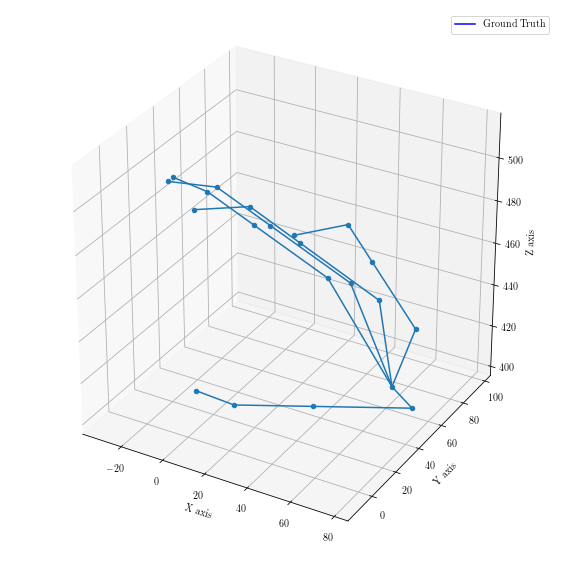

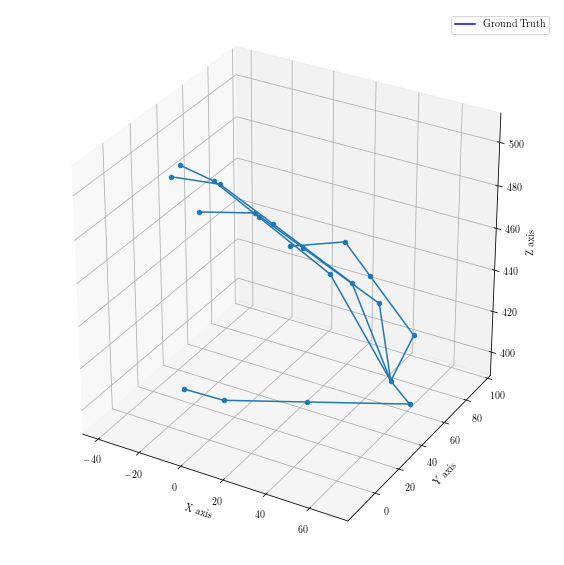

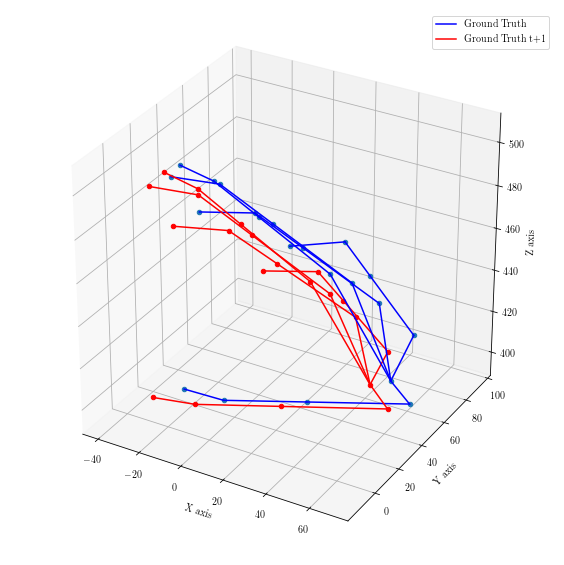

In [14]:
# Testing plotting code
print(Y_test1.shape)
print(X_test1.shape)
print(init_test1.shape)

plot_hand_points(init_test1[0, 0, :])
plot_hand_points(init_test1[0, 1, :])
hand1 = np.squeeze(X_test1[0, 0, 0:63]) + init_test1[0, 0, :]
hand2 = hand1 + np.squeeze(X_test1[0, 0, 63:126])
plot_two_hands(hand1, hand2, first_hand_label='Ground Truth', second_hand_label='Ground Truth t+1')

x_test shape (30, 567)
y_test shape (30, 63)
next_positions shape (30, 63)


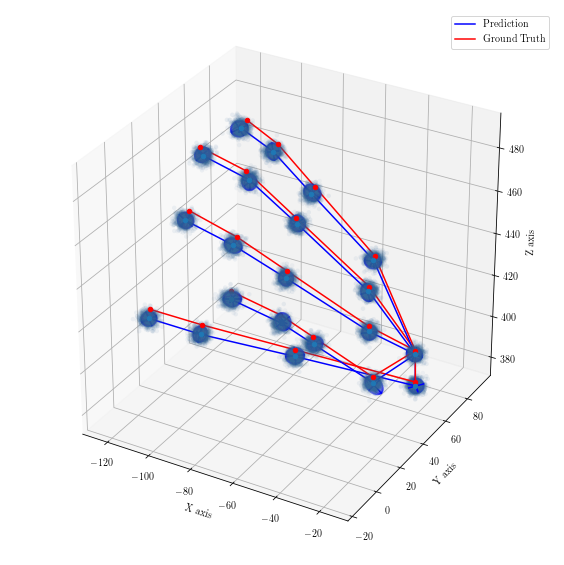

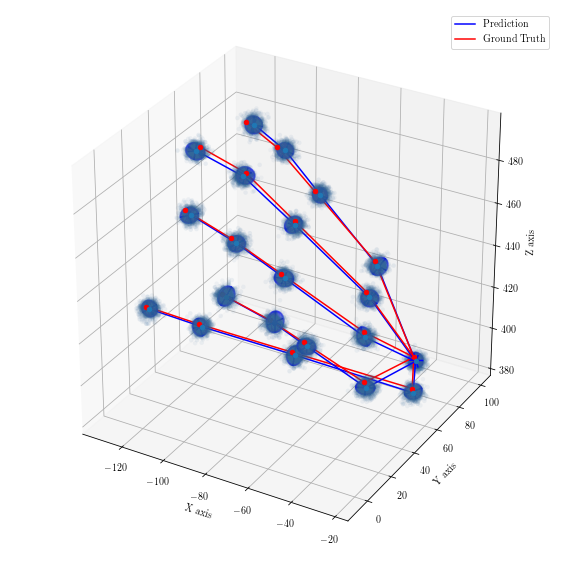

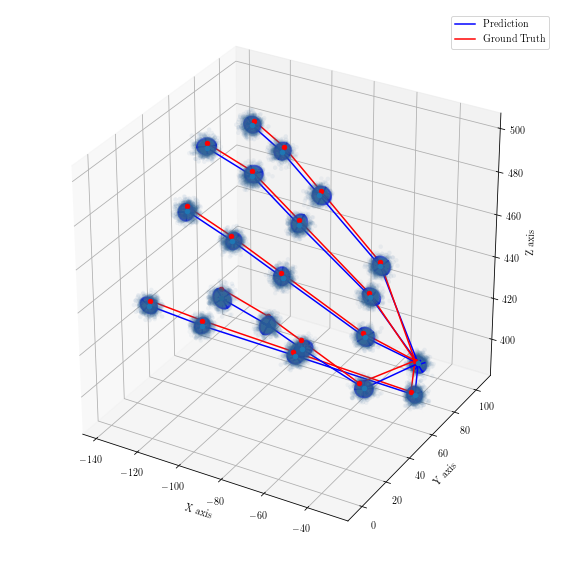

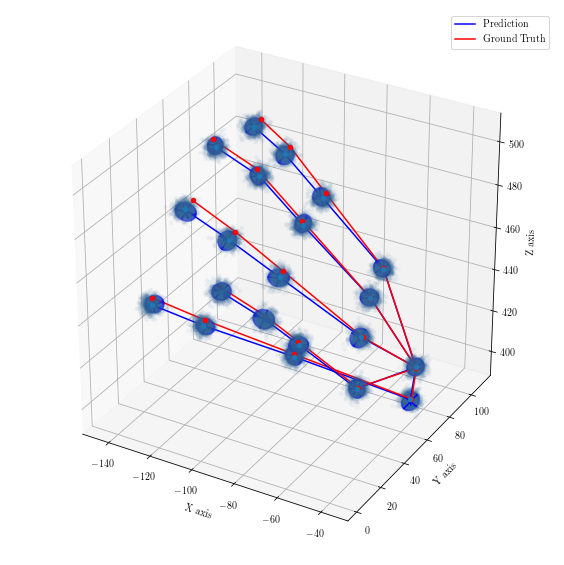

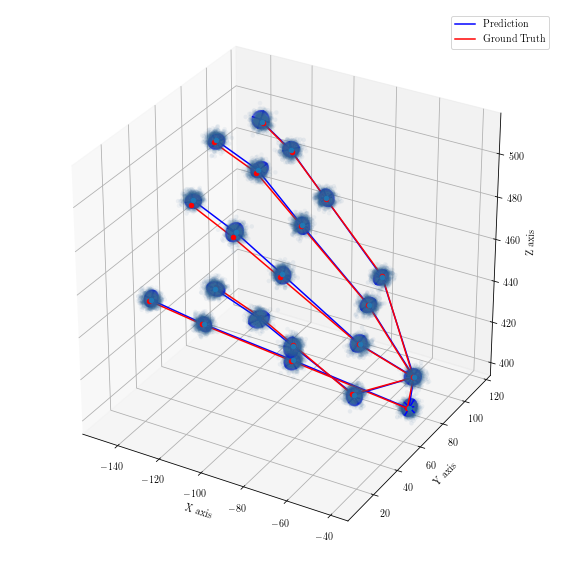

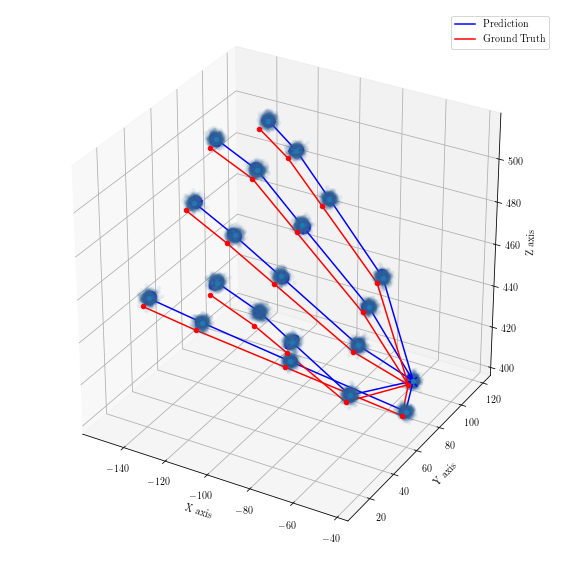

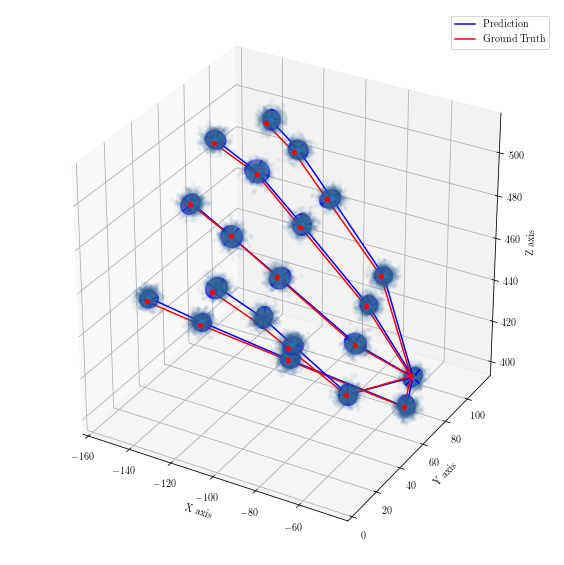

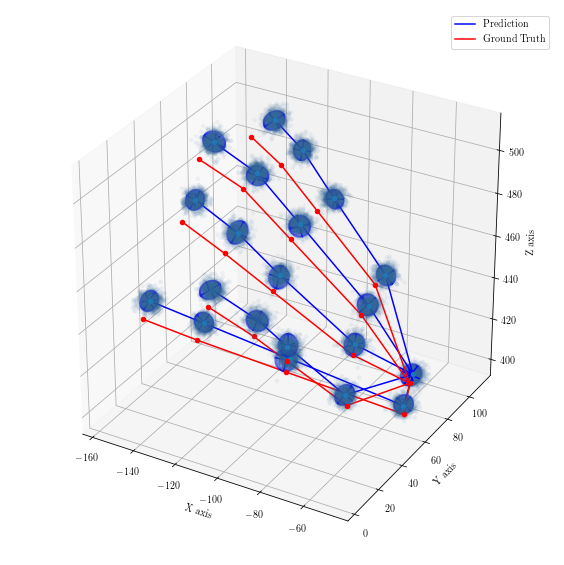

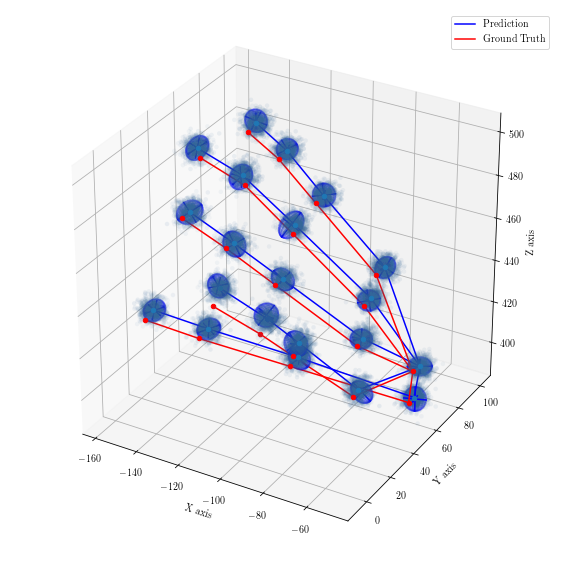

In [15]:
x_test = X_test1[0,:,:];
y_test = Y_test1[0,:,:];
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

next_positions = init_test1[0,:,:]
print('next_positions shape', next_positions.shape)

# Predicting 1 next step at a time
for i in range(1, 10):
    ux = x_test[:i, :]
    ux = np.expand_dims(ux, axis=0)
    uy = y_test[:i, :]
    uy = np.expand_dims(uy, axis=0)
    x = x_test[i, :]
    x = np.expand_dims(np.expand_dims(x, axis=0), axis=0)
    y, s = agent1.test(sess1, ux, uy, x) # y is the predicted next position
    
    next_pos = next_positions[i,:]
    for j in range(num_input_points - 1):
        next_pos = next_pos + np.squeeze(x[:,:,63*j:63*(j+1)])
        
    pred_hand = next_pos + np.squeeze(y)
    true_hand = next_pos + y_test[i, :]
    plot_two_hands(pred_hand, true_hand, pred_uncertainty=s)

ux shape (1, 1, 567)
uy shape (1, 1, 63)
x shape (1, 1, 567)
X_test1 shape (313, 30, 567)
Y_test1 shape (313, 30, 63)
next_positions shape (30, 63)


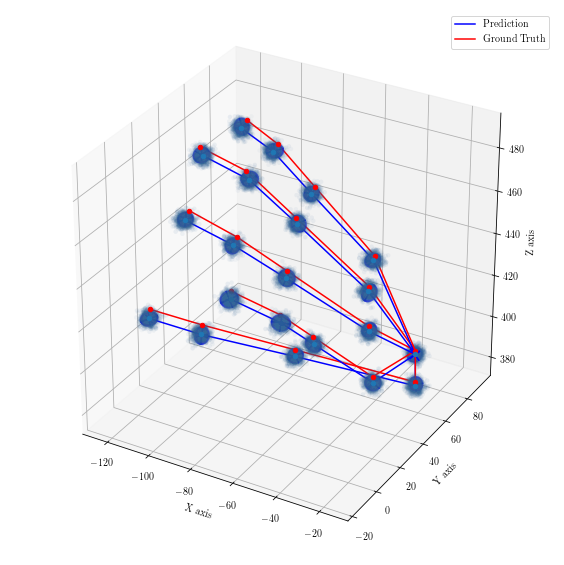

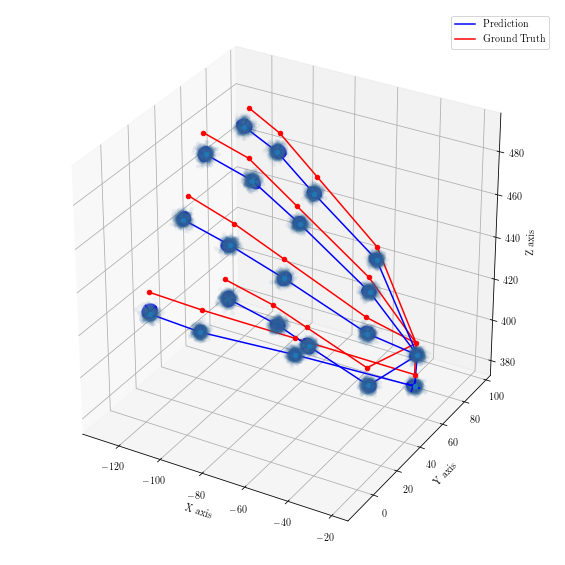

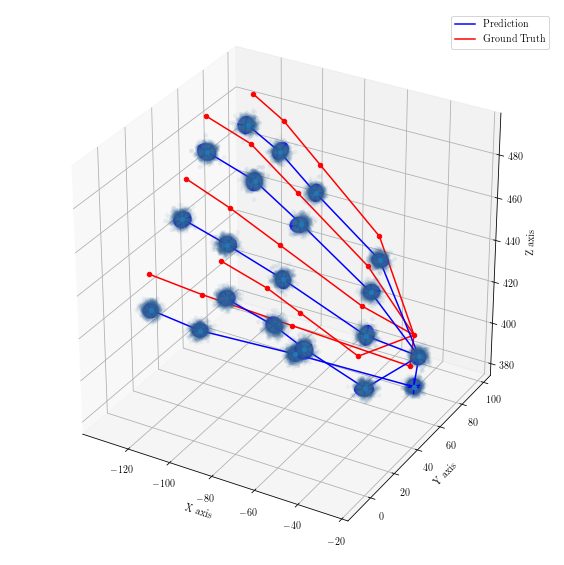

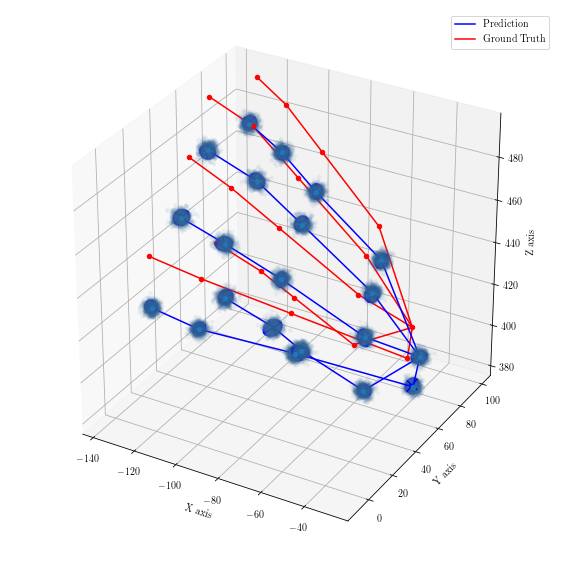

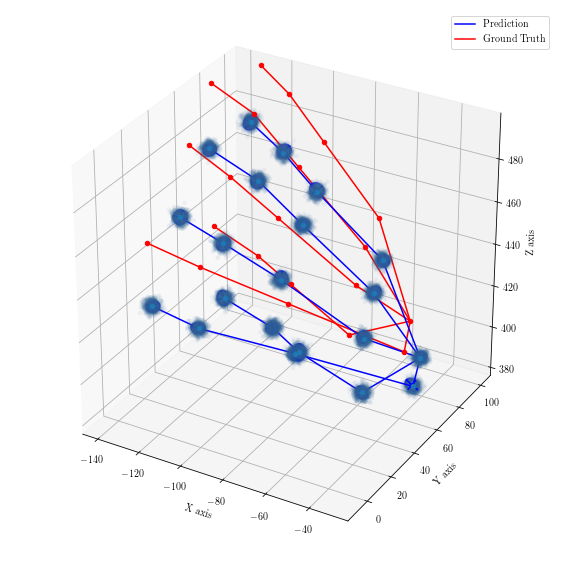

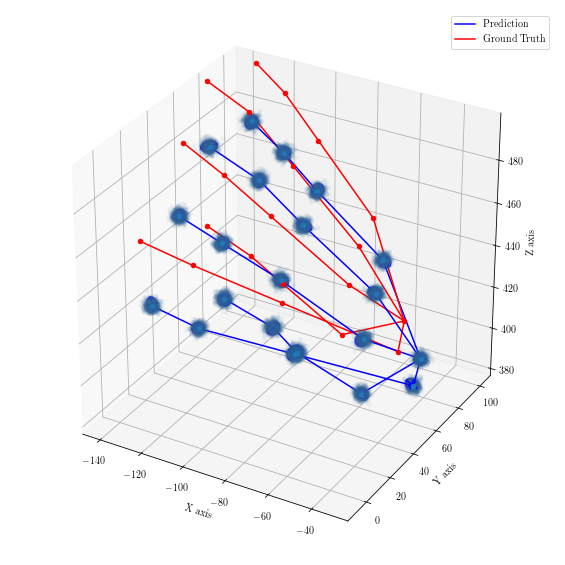

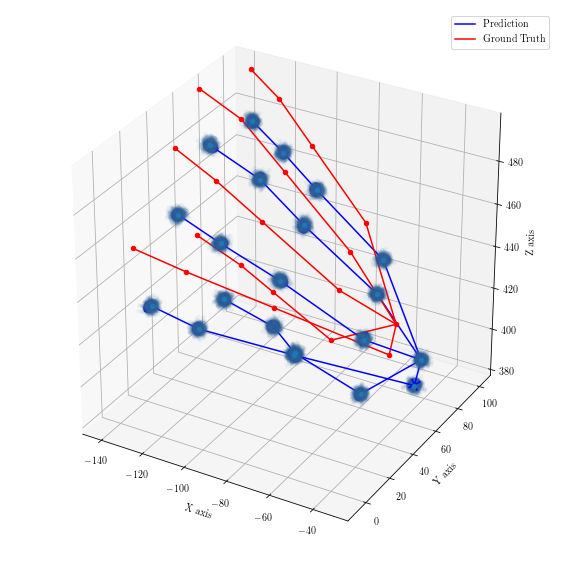

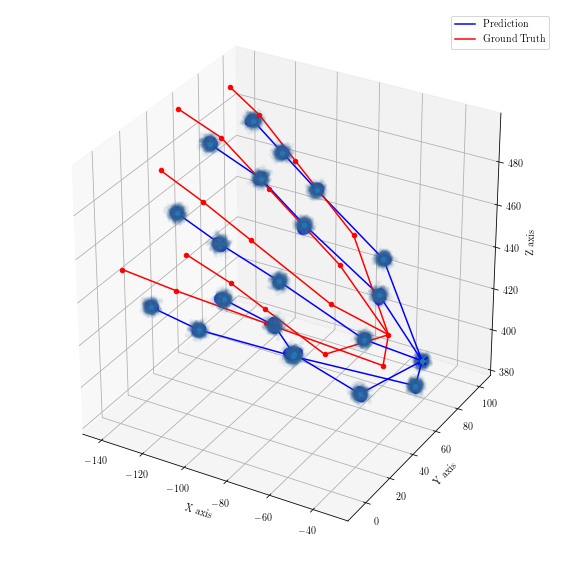

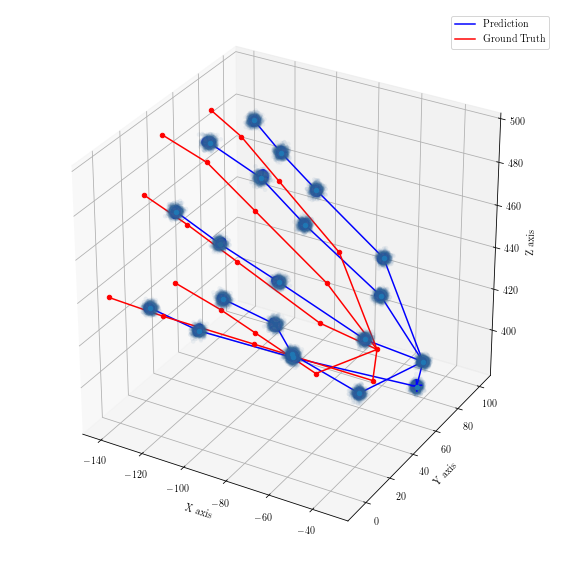

In [16]:
ux = X_test1[0,0,:]
uy = Y_test1[0,0,:]
ux = np.expand_dims(np.expand_dims(ux, axis=0), axis=0)
uy = np.expand_dims(np.expand_dims(uy, axis=0), axis=0)
x = X_test1[0,1,:]
x = np.expand_dims(np.expand_dims(x, axis=0), axis=0)
print('ux shape', ux.shape)
print('uy shape', uy.shape)
print('x shape', x.shape)

print('X_test1 shape', X_test1.shape)
print('Y_test1 shape', Y_test1.shape)

next_positions = init_test1[0,:,:]
print('next_positions shape', next_positions.shape)

# Predicting farther into the future
for i in range(1, 10):
    y, s = agent1.test(sess1, ux, uy, x) # y is the predicted next position
    
    next_pos_pred = next_positions[i,:]
    for j in range(num_input_points - 1):
        next_pos_pred = next_pos_pred + np.squeeze(x[:,:,63*j:63*(j+1)])
    pred_hand = next_pos_pred + np.squeeze(y)
    
    next_pos_true = next_positions[i,:]
    for k in range(num_input_points - 1):
        next_pos_true = next_pos_true + np.squeeze(X_test1[0,i,63*k:63*(k+1)])
    true_hand = next_pos_true + Y_test1[0, i, :]
    
    plot_two_hands(pred_hand, true_hand, pred_uncertainty=s)
    
    ux = np.concatenate((ux, x), axis=1)
    uy = np.concatenate((uy, y), axis=1)
    x = np.concatenate((x[:,:,63:], y), axis=2)

In [ ]:
points_per_traj = 30
yy, xx = train_dataset.sample_trajectories_time(num_samples_train, points_per_traj)
# xx = np.expand_dims(xx, axis=2)
yy_val, xx_val = val_dataset.sample_trajectories_time(num_samples_val, points_per_traj)
# xx_val = np.expand_dims(xx_val, axis=2)
yy_test, xx_test = test_dataset.sample_trajectories_time(num_samples_test, points_per_traj)
# xx_test = np.expand_dims(xx_test, axis=2)

print(len(xx))
print(len(yy))
print(len(xx_val))
print(len(yy_val))
print(len(xx_test))
print(len(yy_test))

print(xx[0].shape)
print(yy[0].shape)

# print('xx shape', xx.shape)
# print('yy shape', yy.shape)
# print('xx_val shape', xx_val.shape)
# print('yy_val shape', yy_val.shape)
# print('xx_test shape', xx_test.shape)
# print('yy_test shape', yy_test.shape)

In [ ]:
g2 = tf.Graph()
sess2 = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True), graph=g2)
agent2 = ALPaCA(config)
agent2.sigma_scalar = noise2
agent2.construct_model(sess2, g2)
agent2.train(sess2, yy, xx, yy_val, xx_val, 200, plot_loss=True)

In [ ]:
rmse = agent2.test_rmse(sess2, xx, yy)
print('Train RMSE:', rmse)

rmse = agent2.test_rmse(sess2, xx_test, yy_test)
print('Test RMSE:', rmse)